# 导包

In [6]:
import pandas as pd
import gc
import operator
import matplotlib.pyplot as plt
import warnings
import math
import joypy
import seaborn as sns
import missingno as msno
import random
import scikitplot as skplt
import numpy as np
from tqdm import tqdm
from scipy.stats import norm, gamma
from sklearn.impute import SimpleImputer as si
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import log_loss, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1.数据初步探索

## 1.1获取数据

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('testA.csv')

## 1.2数据整体分析

### 1.2.1数据描述性统计

In [4]:
print(df_train.shape, df_test.shape)

(800000, 47) (200000, 46)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [3]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,800000.0,399999.500000,230940.252015,0.00,199999.75,399999.500,599999.25,799999.00
loanAmnt,800000.0,14416.818875,8716.086178,500.00,8000.00,12000.000,20000.00,40000.00
term,800000.0,3.482745,0.855832,3.00,3.00,3.000,3.00,5.00
interestRate,800000.0,13.238391,4.765757,5.31,9.75,12.740,15.99,30.99
installment,800000.0,437.947723,261.460393,15.69,248.45,375.135,580.71,1715.42
employmentTitle,799999.0,72005.351714,106585.640204,0.00,427.00,7755.000,117663.50,378351.00
homeOwnership,800000.0,0.614213,0.675749,0.00,0.00,1.000,1.00,5.00
annualIncome,800000.0,76133.910493,68947.513672,0.00,45600.00,65000.000,90000.00,10999200.00
verificationStatus,800000.0,1.009683,0.782716,0.00,0.00,1.000,2.00,2.00
isDefault,800000.0,0.199513,0.399634,0.00,0.00,0.000,0.00,1.00


In [5]:
#查看重复值
df_train.duplicated().sum()

0

### 1.2.2缺失值查看

In [6]:
# 查看缺失特征的数量
df_train.isnull().any().sum()

22

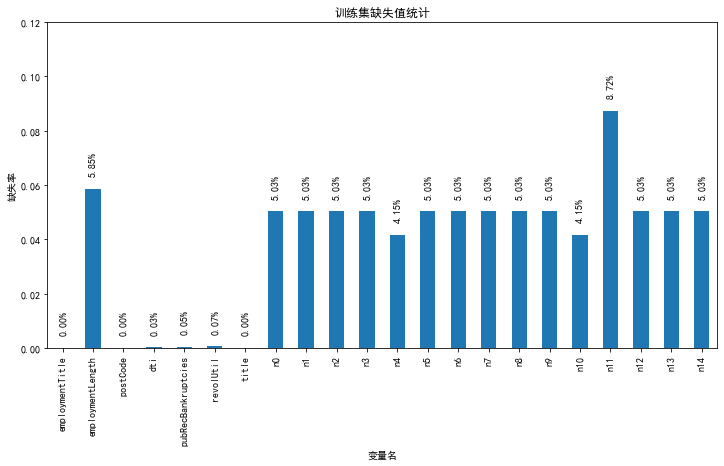

In [9]:
# 统计缺失率
missing = df_train.isnull().sum() / len(df_train)
plt.figure(figsize=(12,6))
missing[missing != 0].plot.bar()
plt.title('训练集缺失值统计')
plt.xlabel('变量名')
plt.ylabel('缺失率')
plt.ylim([0, 0.12])
# 添加数值显示
for x, y in enumerate(missing[missing != 0]):
    plt.text(x,y+0.005,'{:.2%}'.format(y),ha='center',rotation=90)
plt.show()

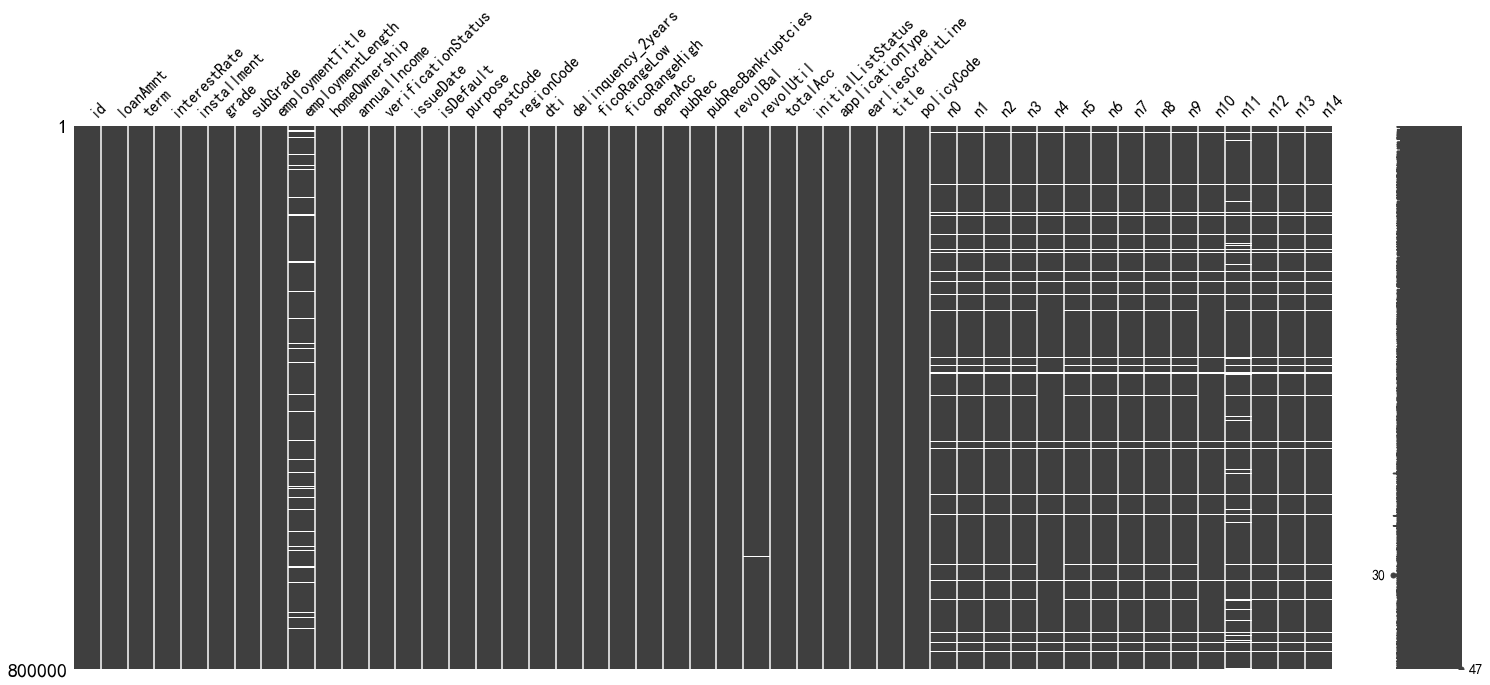

In [3]:
msno.matrix(df_train)
plt.show()

### 1.2.3唯一值查看

In [27]:
# 查看唯一值
[col for col in df_train.columns if df_train[col].nunique() <= 1]

['policyCode']

In [28]:
[col for col in df_test.columns if df_test[col].nunique() <= 1]

['policyCode']

In [29]:
df_train['policyCode'][0]

1.0

In [30]:
df_test['policyCode'][0]

1.0

# 2.数据可视化分析

## 2.1单一变量分析

### 2.1.1探索标签分布

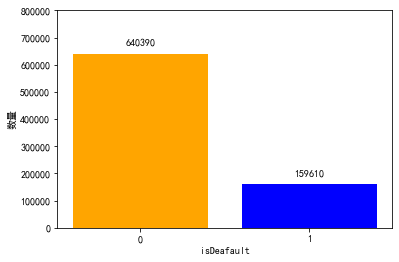

In [37]:
# 探索标签的分布
isDeafault_1 = (df_train['isDefault'] == 1).sum()
isDeafault_0 = (df_train['isDefault'] == 0).sum()
plt.bar([0,1], [isDeafault_0, isDeafault_1], color=['orange','b'])
plt.xticks([0,1], ['0', '1'])  
plt.xlabel("isDeafault") 
plt.ylabel('数量')
plt.ylim([0, 800000])
# 添加数值显示
for x, y in enumerate([isDeafault_0, isDeafault_1]):
    plt.text(x,y+30000,'{:}'.format(y),ha='center')

### 2.1.2探索特征整体分布

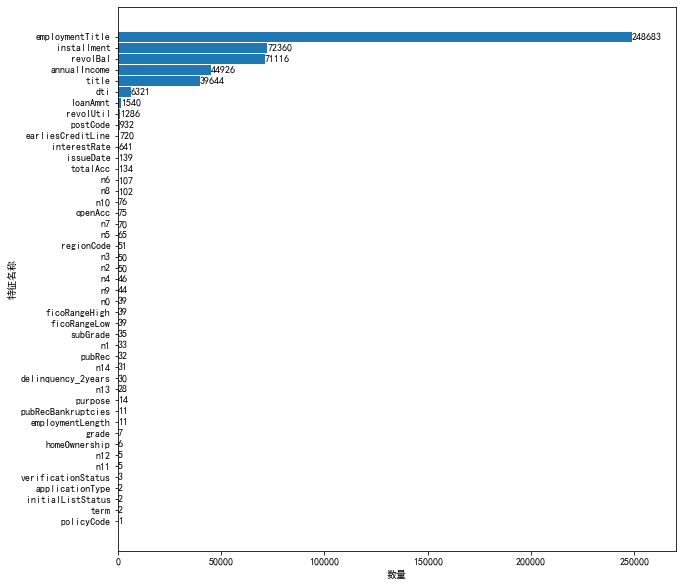

In [5]:
# 探索特征取值的数量
# del df_train['isDefault']
# del df_train['id']
dic = {}
cols = df_train.columns
for i in range(len(cols)):
    col = cols[i]
    nums = df_train[col].drop_duplicates().count()
    dic[col] = nums
res = sorted(dic.items(), key=operator.itemgetter(1))
k = []
v = []
for i in range(len(res)):
    k.append(res[i][0])
    v.append(res[i][1])
plt.figure(figsize=(10,10))
b = plt.barh(k, v, height=0.9)
plt.xlim([0, 270000])
plt.xlabel("数量") 
plt.ylabel('特征名称')
for rect in b:
    w=rect.get_width()
    plt.text(w,rect.get_y()+rect.get_height()/2,'%d'%w,ha='left',va='center')

### 2.1.3探索部分分类型变量

#### 探索grade和subGrade

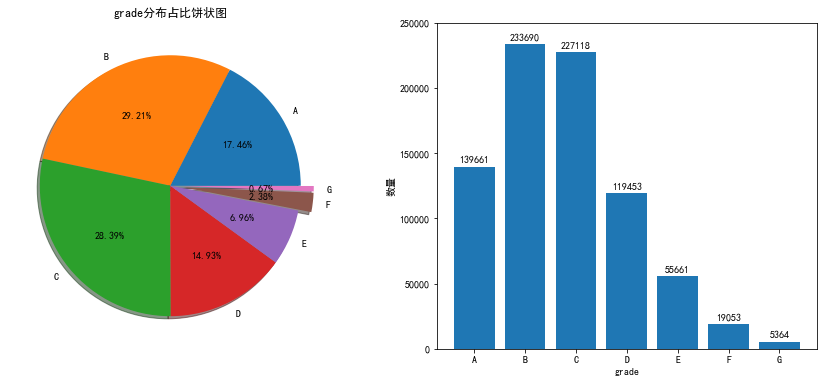

In [50]:
# 探索grade的数量分布
g = np.sort(df_train["grade"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['grade']==g[i]]) for i in range(len(g))]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('grade分布占比饼状图')
explode = (0,0,0,0,0,0.1,0.1)
plt.pie(x=g_cnt,labels=g,autopct='%3.2f%%',shadow=True,explode=explode)
plt.subplot(1, 2, 2)
plt.bar(g, g_cnt)
plt.ylim([0, 250000])
plt.xlabel("grade") 
plt.ylabel('数量')
for x, y in enumerate(g_cnt):
    plt.text(x,y+3000,'{:}'.format(y),ha='center')

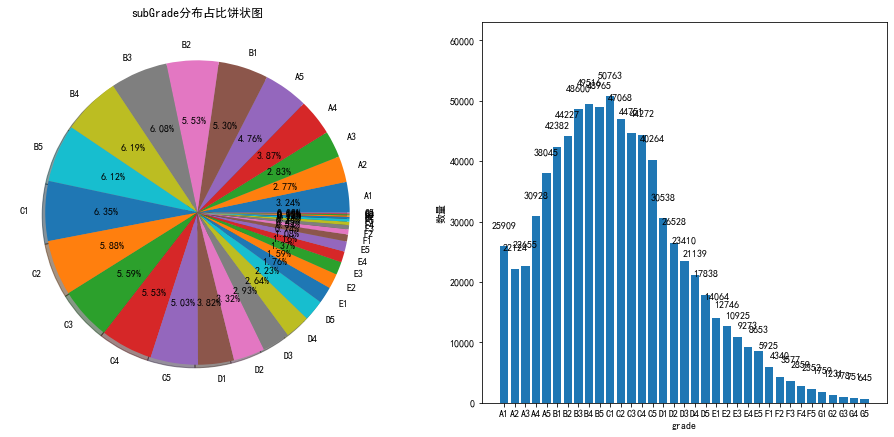

In [103]:
# 探索subGrade的数量分布
g = np.sort(df_train["subGrade"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['subGrade']==g[i]]) for i in range(len(g))]

plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
plt.title('subGrade分布占比饼状图')
plt.pie(x=g_cnt,labels=g,autopct='%3.2f%%',shadow=True)
plt.subplot(1, 2, 2)
plt.bar(g, g_cnt)
plt.ylim([0, 63000])
plt.xlabel("grade") 
plt.ylabel('数量')
for x, y in enumerate(g_cnt):
    plt.text(x,y+3000,'{:}'.format(y),ha='center')

#### 探索purpose

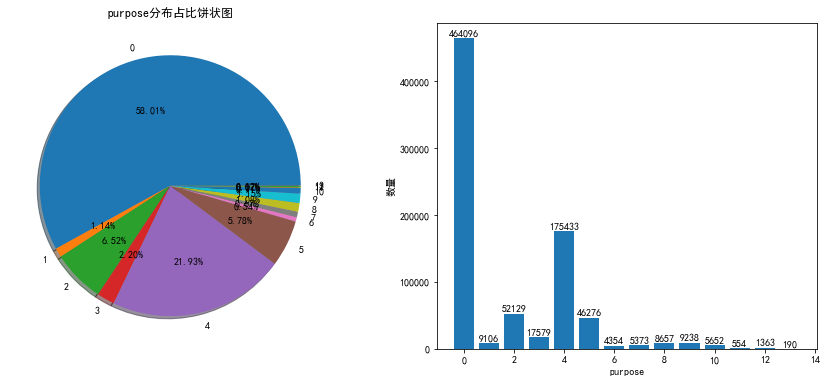

In [105]:
# 探索purpose的数量分布
g = np.sort(df_train["purpose"].drop_duplicates().values)
g_cnt = [len(df_train[df_train['purpose']==g[i]]) for i in range(len(g))]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('purpose分布占比饼状图')
plt.pie(x=g_cnt,labels=g,autopct='%3.2f%%',shadow=True)
plt.subplot(1, 2, 2)
plt.bar(g, g_cnt)
plt.xlabel("purpose") 
plt.ylabel('数量')
for x, y in enumerate(g_cnt):
    plt.text(x,y+3000,'{:}'.format(y),ha='center')

### 2.1.4探索部分连续型变量

#### 探索installment

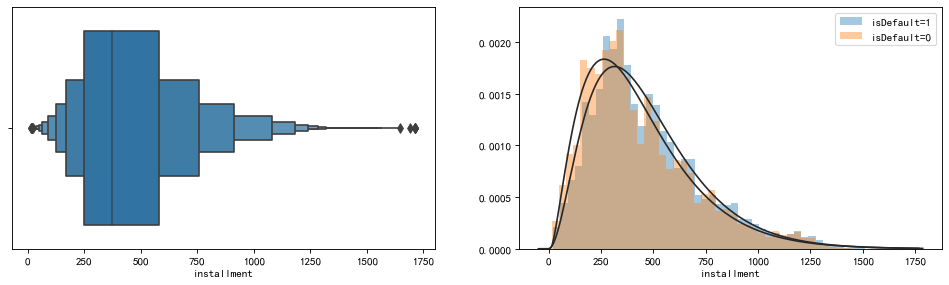

In [19]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['installment'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['isDefault']==1]['installment'], kde=False, fit=gamma, label="isDefault=1")
sns.distplot(df_train.loc[df_train['isDefault']==0]['installment'], kde=False, fit=gamma, label="isDefault=0")
plt.legend()

#### 探索annualIncome

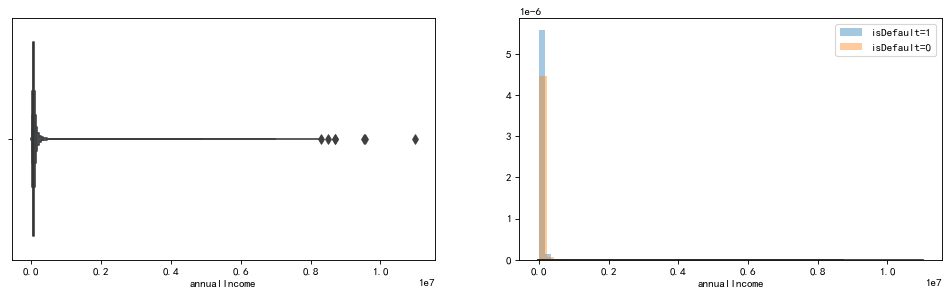

In [20]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['annualIncome'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['isDefault']==1]['annualIncome'], kde=False, fit=gamma, label="isDefault=1")
sns.distplot(df_train.loc[df_train['isDefault']==0]['annualIncome'], kde=False, fit=gamma, label="isDefault=0")
plt.legend()

#### 探索loanAmnt

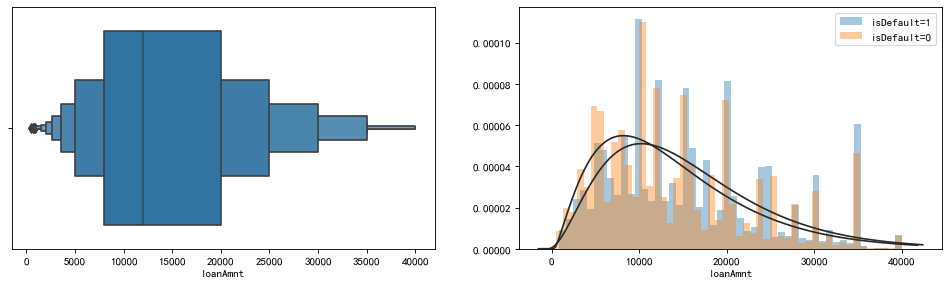

In [22]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['loanAmnt'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['isDefault']==1]['loanAmnt'], kde=False, fit=gamma, label="isDefault=1")
sns.distplot(df_train.loc[df_train['isDefault']==0]['loanAmnt'], kde=False, fit=gamma, label="isDefault=0")
plt.legend()

#### 探索interestRate

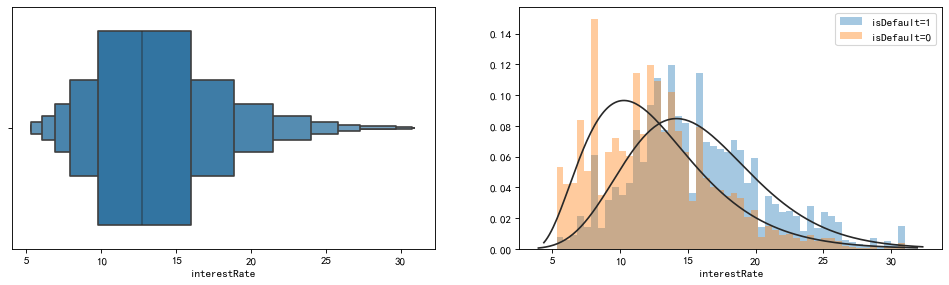

In [23]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['interestRate'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['isDefault']==1]['interestRate'], kde=False, fit=gamma, label="isDefault=1")
sns.distplot(df_train.loc[df_train['isDefault']==0]['interestRate'], kde=False, fit=gamma, label="isDefault=0")
plt.legend()

#### 探索totalAcc

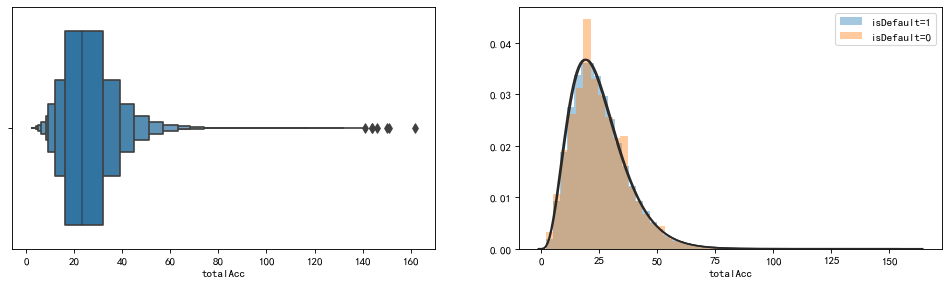

In [24]:
plt.figure(6, figsize=(15,4), dpi=80)
plt.subplot(1, 2, 1)
sns.boxenplot(x=df_train['totalAcc'])
plt.subplot(1, 2, 2)
sns.distplot(df_train.loc[df_train['isDefault']==1]['totalAcc'], kde=False, fit=gamma, label="isDefault=1")
sns.distplot(df_train.loc[df_train['isDefault']==0]['totalAcc'], kde=False, fit=gamma, label="isDefault=0")
plt.legend()

# 2.2双变量分析

### 2.2.1探索样本分布与违约率

Text(0, 0.5, '违约率')

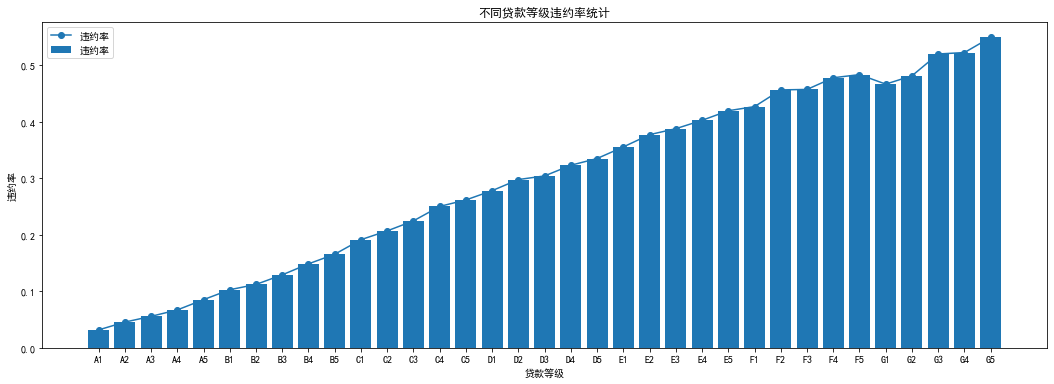

In [51]:
# 探索subGrade和违约率
sg = np.sort(df_train["subGrade"].drop_duplicates().values)
sg_mr = [len(df_train[df_train['subGrade']==sg[i]][df_train['isDefault']==1])/len(df_train[df_train['subGrade']==sg[i]]) for i in range(len(sg))]
plt.figure(figsize=(18,6))
plt.plot(sg, sg_mr, 'o-', label="违约率")
plt.bar(sg, sg_mr, label="违约率")
plt.legend()
plt.title('不同贷款等级违约率统计')
plt.xlabel('贷款等级')
plt.ylabel('违约率')

#### 探索employmentLength与违约率

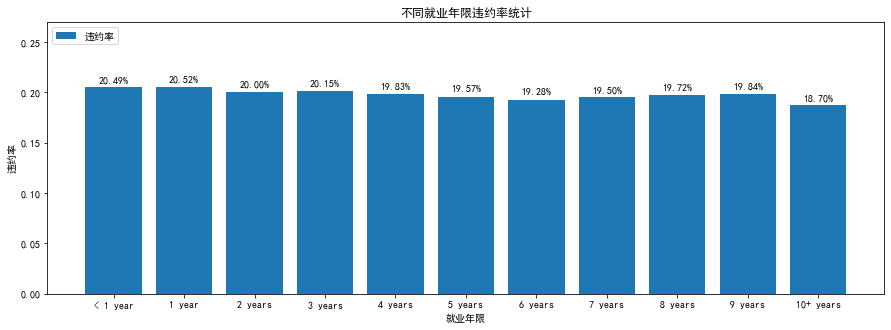

In [52]:
# 探索employmentLength和违约率
el = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
el_mr = [len(df_train[df_train['employmentLength']==el[i]][df_train['isDefault']==1])/len(df_train[df_train['employmentLength']==el[i]]) for i in range(len(el))]
plt.figure(figsize=(15,5))
plt.bar(el, el_mr, align = 'center', label="违约率")
plt.title('不同就业年限违约率统计')
plt.xlabel('就业年限')
plt.ylabel('违约率')
plt.ylim([0, 0.27])
plt.legend(loc = 2)
for x, y in enumerate(el_mr):
    plt.text(x,y+0.005,'{:.2%}'.format(y),ha='center')
plt.show()

#### 探索issueDate与违约率

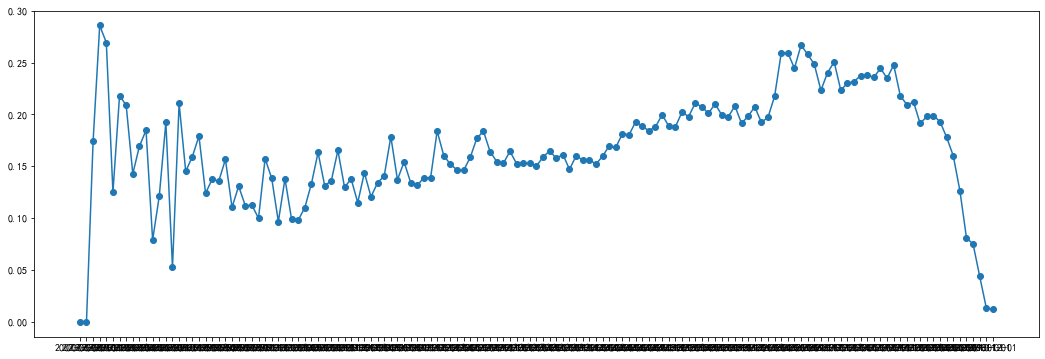

In [53]:
# 探索issueDate和违约率
id = np.sort(df_train["issueDate"].drop_duplicates().values)
id_mr = [len(df_train[df_train['issueDate']==id[i]][df_train['isDefault']==1])/len(df_train[df_train['issueDate']==id[i]]) for i in range(len(id))]
plt.figure(figsize=(18,6))
plt.plot(id, id_mr, 'o-')

#### 探索earliesCreditLine与违约率

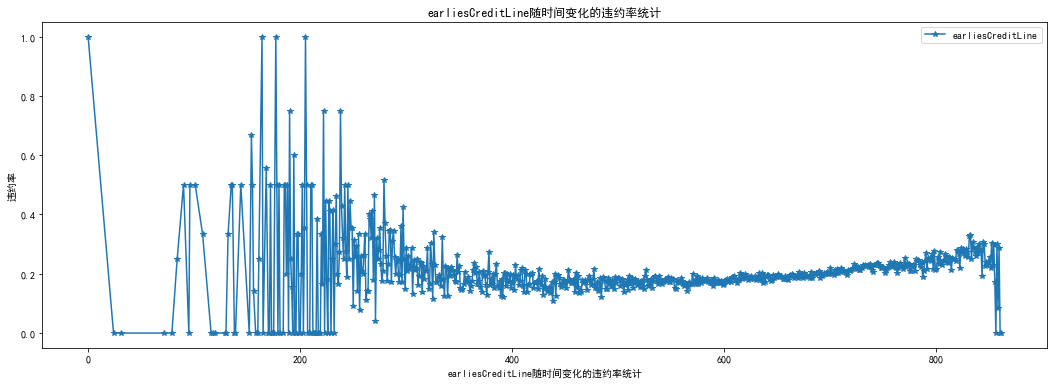

In [58]:
# 处理earliesCreditLine格式
dic = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 'Sep':'09',
       'Oct':'10', 'Nov':'11', 'Dec':'12'}
for i in range(len(df_train)):
    print(i)
    df_train["earliesCreditLine"][i] = df_train["earliesCreditLine"][i][4:8] + "-" + dic[df_train["earliesCreditLine"][i][0:3]]
for i in range(len(df_train)):
    print(i)
    year = int(str(df_train['earliesCreditLine'][i])[0:4])
    month = int(str(df_train['earliesCreditLine'][i])[5:7])
    df_train['earliesCreditLine'][i] = (year-1944)*12+month-1
# 探索earliesCreditLine和违约率
ecl = np.sort(df_train["earliesCreditLine"].drop_duplicates().values)
ecl_mr = [len(df_train[df_train['earliesCreditLine']==ecl[i]][df_train['isDefault']==1])/len(df_train[df_train['earliesCreditLine']==ecl[i]]) for i in range(len(ecl))]
plt.figure(figsize=(18,6))
plt.title('earliesCreditLine随时间变化的违约率统计')
plt.xlabel('earliesCreditLine随时间变化的违约率统计')
plt.ylabel('违约率')
plt.plot(ecl, ecl_mr, '*-', label="earliesCreditLine")
plt.legend()

#### 探索regionCode与违约率

Text(0, 0.5, '违约率')

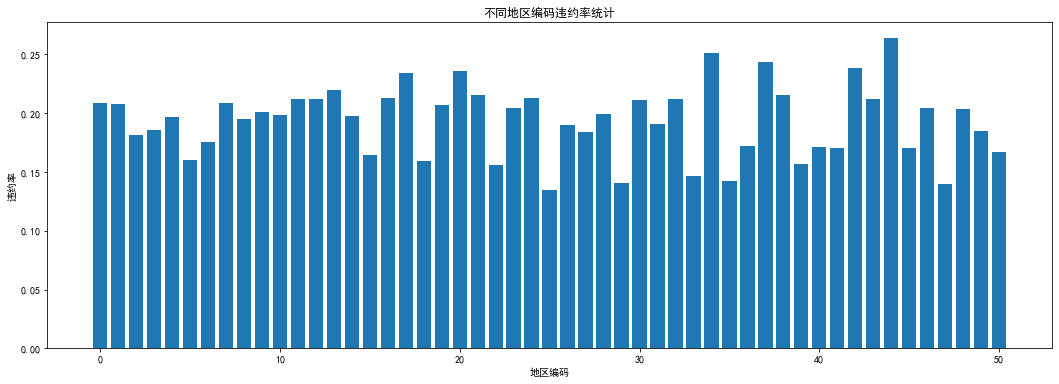

In [55]:
# 探索regionCode和违约率
id = np.sort(df_train["regionCode"].drop_duplicates().values)
id_mr = [len(df_train[df_train['regionCode']==id[i]][df_train['isDefault']==1])/len(df_train[df_train['regionCode']==id[i]]) for i in range(len(id))]
plt.figure(figsize=(18,6))
plt.bar(id, id_mr)
plt.title('不同地区编码违约率统计')
plt.xlabel('地区编码')
plt.ylabel('违约率')

### 2.2.2相关性分析

<AxesSubplot:>

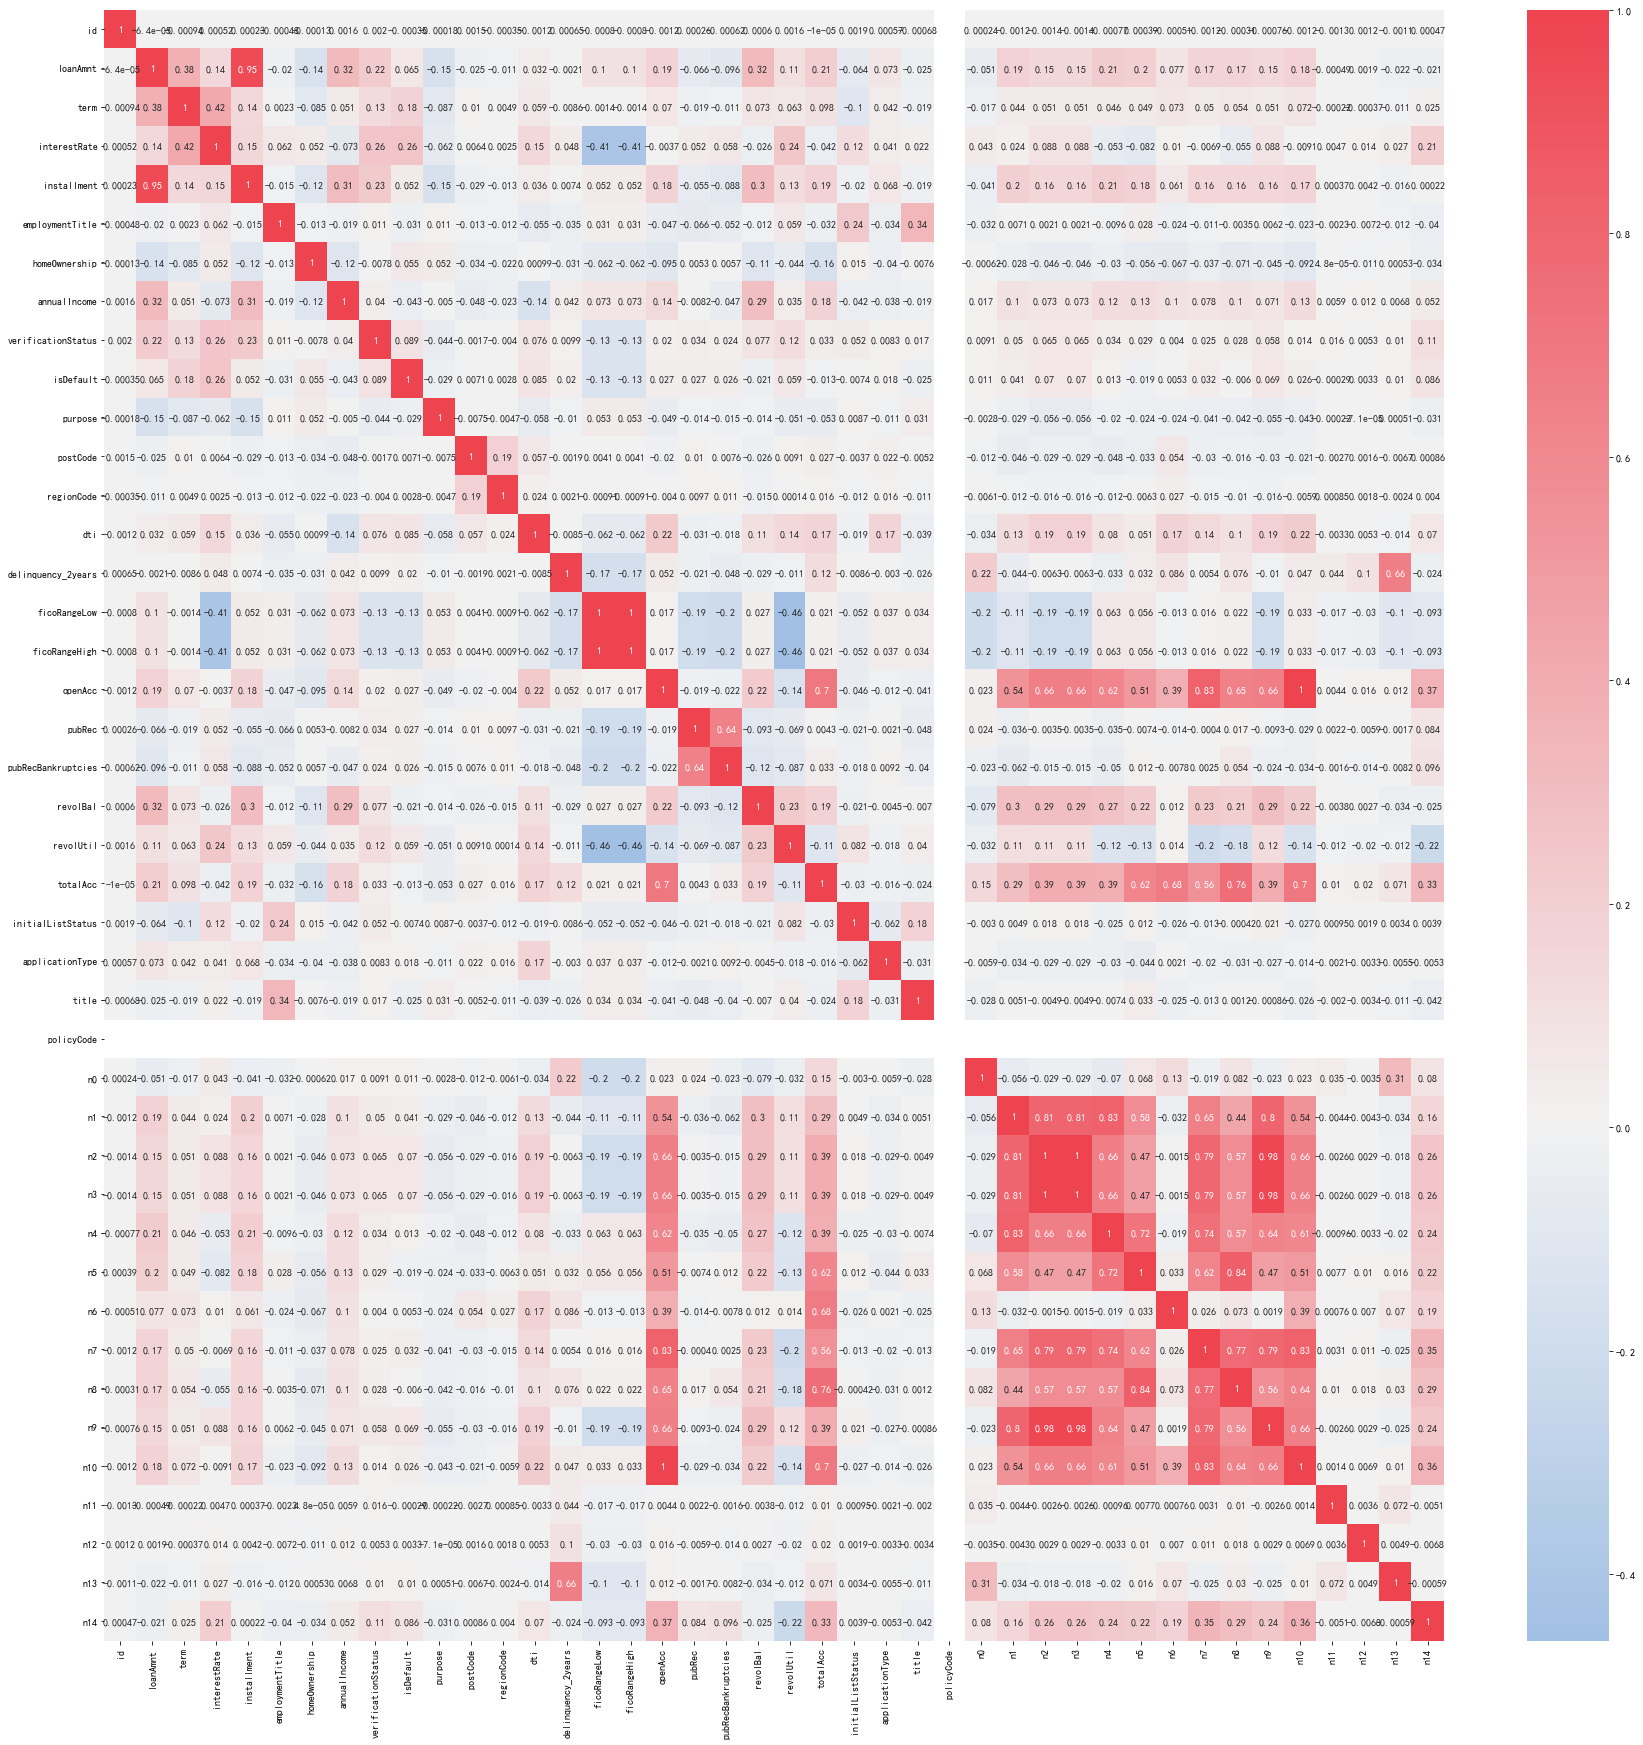

In [4]:
# 画相关系数热力图
corrmat = df_train.corr()
plt.figure(figsize=(30,30))
cmap=sns.diverging_palette(250,10,s=80,l=55,n=9,as_cmap=True)
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

### 2.2.3探索匿名变量

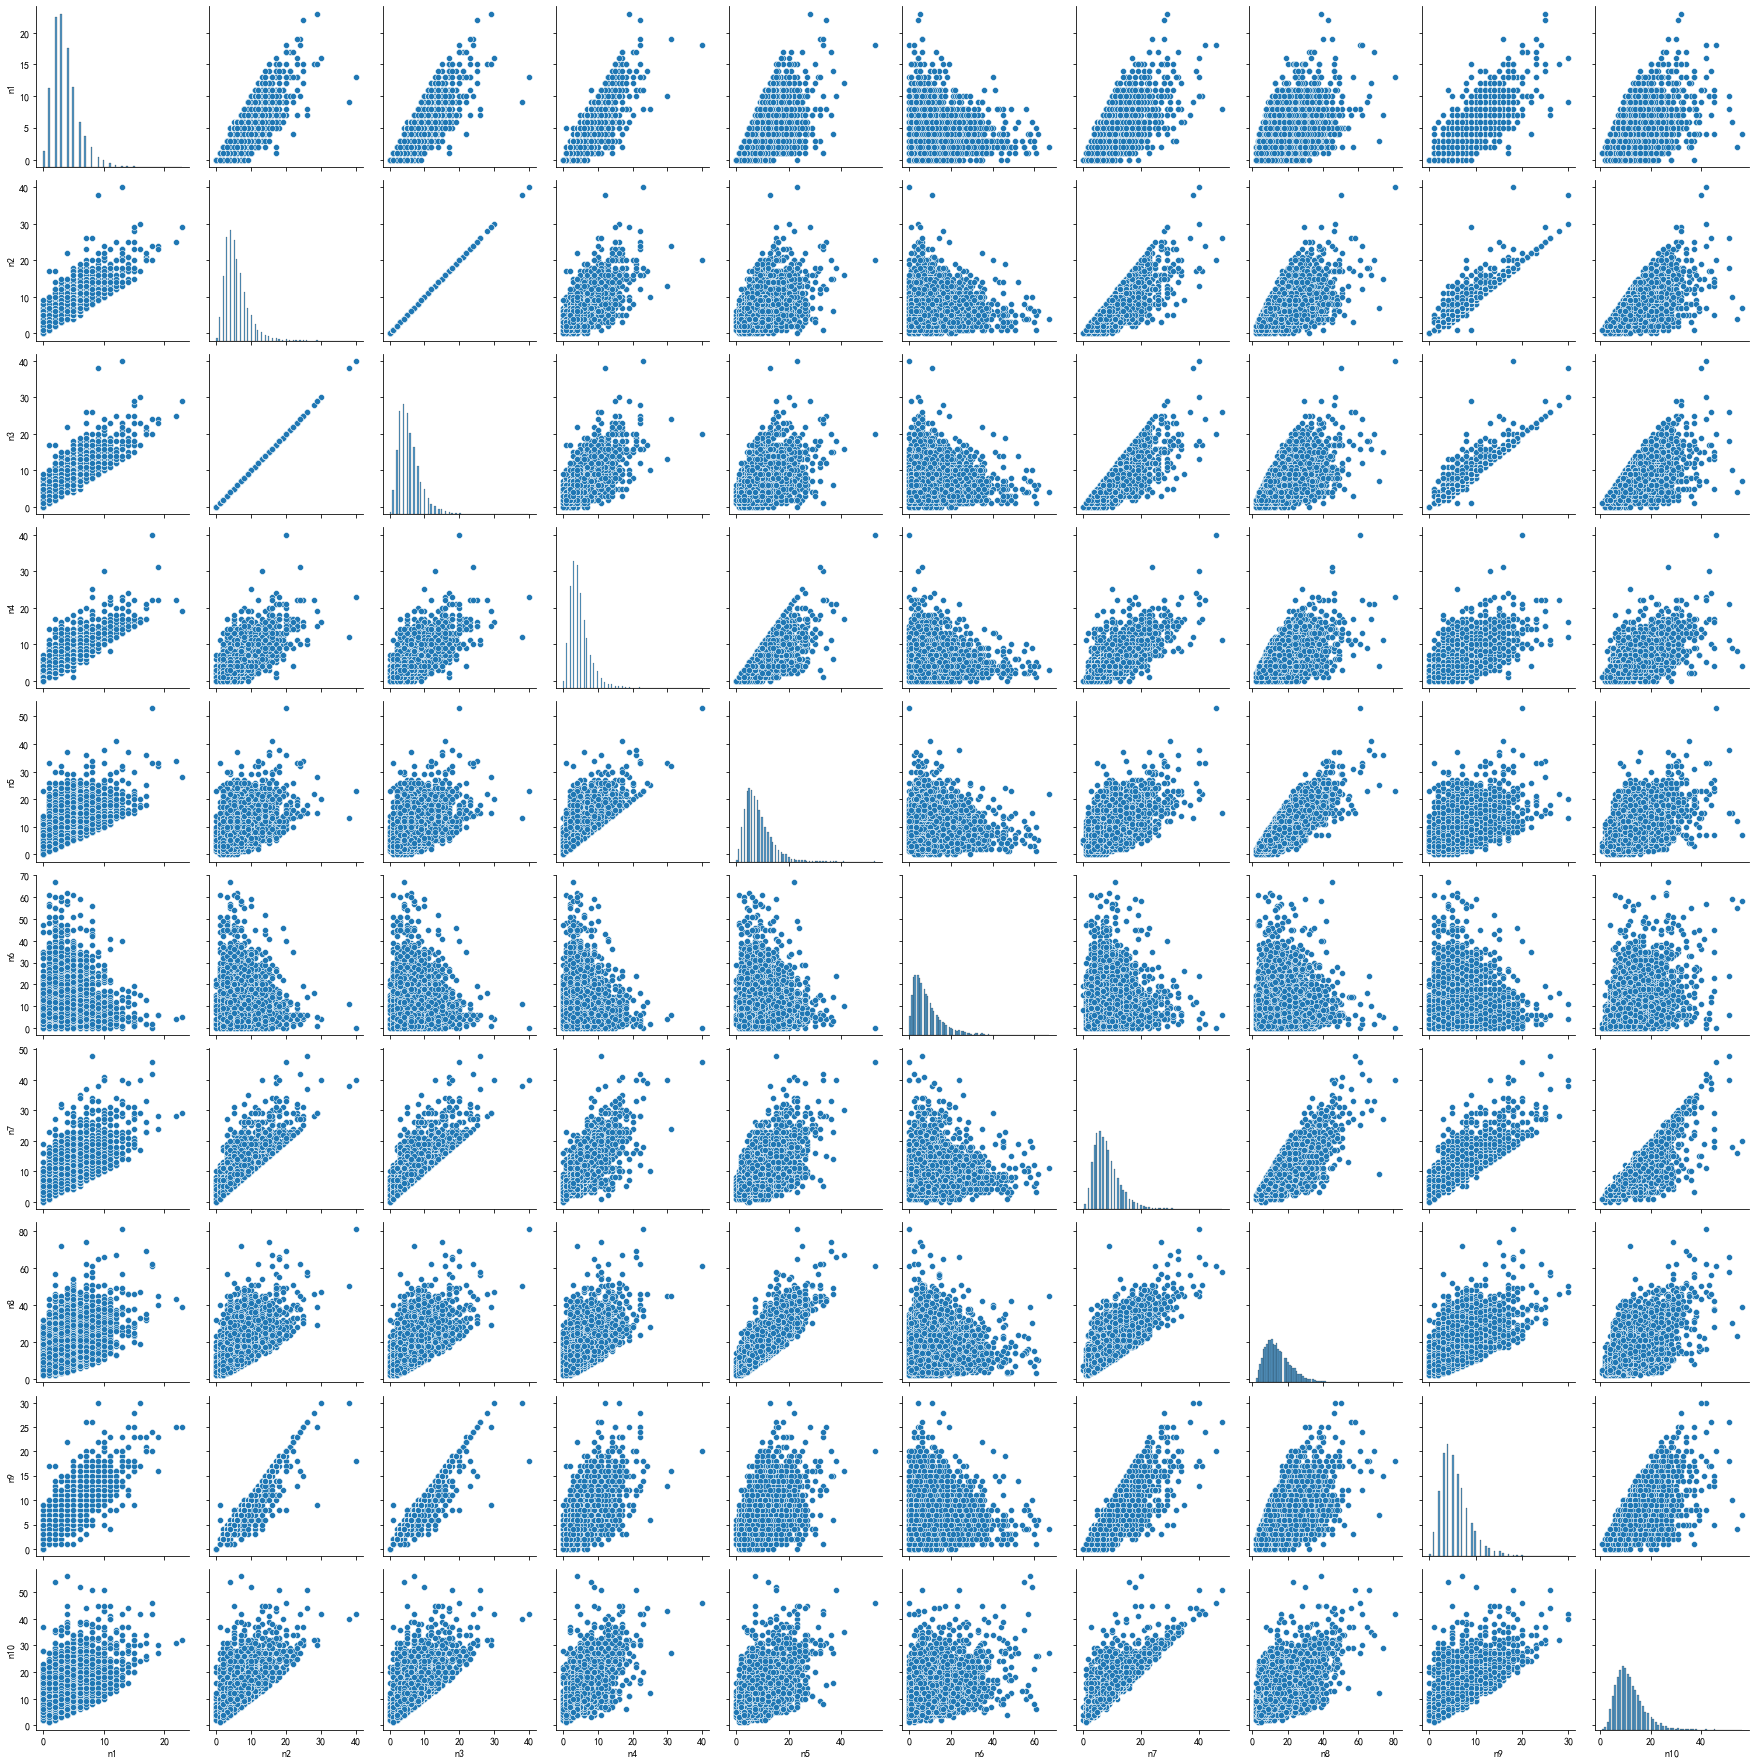

In [19]:
g = sns.PairGrid(df_train[['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']][:10000])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### 2.2.4探索其他特征

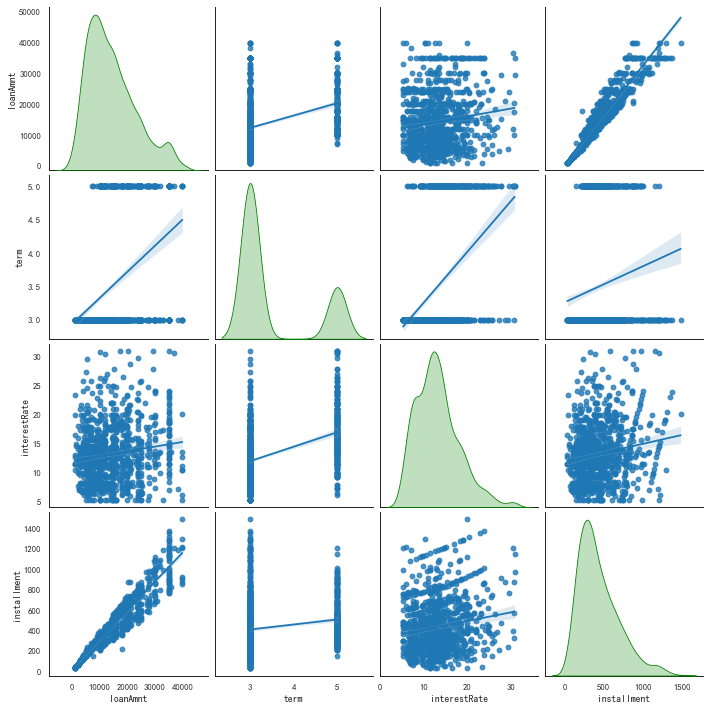

In [31]:
new_data = df_train[['loanAmnt','term','interestRate','installment']][:1000]
sns.pairplot(new_data, kind = 'reg',diag_kind='kde',palette ='husl', diag_kws=dict(shade = True, color = 'g'))

## 2.3多变量分析

In [17]:
df_train = df_train.fillna(0)
tt = []
for i in range(len(df_train['employmentLength'])):
    if df_train['employmentLength'][i] == '10+ years':
        tt.append(10)
    elif df_train['employmentLength'][i] == '< 1 year':
        tt.append(0)
    elif df_train['employmentLength'][i] == '1 year':
        tt.append(1)
    elif df_train['employmentLength'][i] == 0:
        tt.append(0)
    else:
        tt.append(int(df_train['employmentLength'][i][:-6]))
df_train['employmentLength'] = tt

Text(0, 0.5, '就业年限')

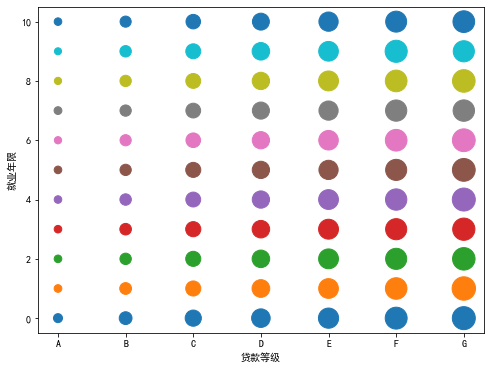

In [64]:
columns = pd.Series({0:'A', 1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'})
row = df_train['employmentLength']
row = row.drop_duplicates().sort_values().reset_index(drop=True)
arr1 = []
arr2 = []
for i in range(11):
    temp1 = []
    temp2 = []
    for j in range(7):
        s = row[i]
        d = columns[j]
        size = df_train['employmentLength']
        if df_train[(df_train['grade'] == d) & (size == s)].shape[0] != 0:
            temp1.append(1)
        else:
            temp1.append(0)
        temp2.append((df_train[(df_train['grade'] == d) & (size == s)]['isDefault'] == 1).sum()/df_train[(df_train['grade'] == d) & (size == s)].shape[0])
    arr1.append(temp1)
    arr2.append(temp2)
new_df1 = pd.DataFrame(data = arr1, index = row, columns = columns)
new_df2 = pd.DataFrame(data = arr2, index = row, columns = columns)
#设置大小
p4 = plt.figure(figsize = (8, 6))
ax4 = p4.add_subplot(1, 1, 1)
plt.sca(ax4)
for i in range(11):
    plt.scatter(columns, new_df1[new_df1.index == row[i]] * row[i], s = new_df2[new_df2.index == row[i]] * 1000)
plt.xlabel("贷款等级")
plt.ylabel("就业年限")

In [52]:
(df_train[(df_train['grade'] == d) & (size == s)]['isDefault'] == 1).sum()/df_train[(df_train['grade'] == d) & (size == s)].shape[0]

0.4699393270821842

# 2.数据预处理

## 2.1处理缺失值

In [63]:
#由于缺失值所占比例较小，因此使用中位数填补
queshi = ["employmentTitle", "postCode", "dti", "pubRecBankruptcies", "revolUtil", "title"]
for i in range(len(queshi)):
    el = df_train.loc[:, queshi[i]].values.reshape(-1, 1)
    imp_mode = si(strategy="most_frequent")
    df_train[queshi[i]] = imp_mode.fit_transform(el)

In [44]:
# 前6个缺失值填补完毕，还剩最后十六个
df_train.isnull().any().sum()

16

In [64]:
queshi2 = df_train.loc[df_train['n0'].isnull() & df_train['n1'].isnull() & df_train['n2'].isnull() & df_train['n3'].isnull() & 
                                       df_train['n5'].isnull() & df_train['n6'].isnull() & df_train['n7'].isnull() &
             df_train['n8'].isnull() & df_train['n9'].isnull() &                           df_train['n11'].isnull() &
             df_train['n12'].isnull() & df_train['n13'].isnull() & df_train['n14'].isnull()]
len(queshi2)/len(df_train)

0.0503375

In [65]:
# 删除这些行
df_train = df_train.drop(queshi2.index)
# 查看缺失特征的数量
df_train.isnull().any().sum()

3

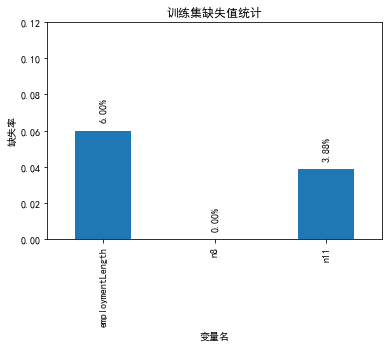

In [60]:
# 统计缺失率
missing = df_train.isnull().sum() / len(df_train)
missing[missing != 0].plot.bar()
plt.title('训练集缺失值统计')
plt.xlabel('变量名')
plt.ylabel('缺失率')
plt.ylim([0, 0.12])
# 添加数值显示
for x, y in enumerate(missing[missing != 0]):
    plt.text(x,y+0.005,'{:.2%}'.format(y),ha='center',rotation=90)
plt.show()

In [66]:
#由于缺失值所占比例较小，因此使用众数填补
df_train["employmentLength"] = imp_mode.fit_transform(df_train.loc[:, "employmentLength"].values.reshape(-1, 1))
df_train["n8"] = imp_mode.fit_transform(df_train.loc[:, "n8"].values.reshape(-1, 1))
df_train["n11"] = imp_mode.fit_transform(df_train.loc[:, "n11"].values.reshape(-1, 1))
# 查看缺失特征的数量
print(f"有{df_train.isnull().any().sum()}个特征有缺失数据")

有0个特征有缺失数据


## 2.2删除唯一值

In [67]:
# 删除唯一值
df_train = df_train.drop('policyCode', axis=1)
df_test = df_test.drop('policyCode', axis=1)
print('此时训练集上取值唯一的特征数量为：',len([col for col in df_train.columns if df_train[col].nunique() <= 1]),
     '此时测试集上取值唯一的特征数量为：',len([col for col in df_test.columns if df_test[col].nunique() <= 1]))

此时训练集上取值唯一的特征数量为： 0 此时测试集上取值唯一的特征数量为： 0


## 2.3处理时间格式数据

In [69]:
df_train[['issueDate', 'earliesCreditLine']].head()

,issueDate,earliesCreditLine
0,2014-07-01,Aug-2001
2,2015-10-01,May-2006
3,2015-08-01,May-1999
4,2016-03-01,Aug-1977
5,2017-04-01,Jul-1998


In [70]:
# 处理issueDate
#转化成时间格式
df_train['issueDate'] = pd.to_datetime(df_train['issueDate'],format='%Y-%m-%d')
#找到最早时间
df_train['issueDate'].min()

Timestamp('2012-08-01 00:00:00')

In [79]:
df_train = df_train.reset_index()
for i in range(len(df_train)):
    year = int(str(df_train['issueDate'][i])[0:4])
    month = int(str(df_train['issueDate'][i])[5:7])
    df_train['issueDate'][i] = (year-2012)*12+month-8
for i in range(len(df_test)):
    year = int(str(df_test['issueDate'][i])[0:4])
    month = int(str(df_test['issueDate'][i])[5:7])
    df_test['issueDate'][i] = (year-2012)*12+month-8

In [81]:
# 处理earliesCreditLine格式
dic = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 'Sep':'09',
       'Oct':'10', 'Nov':'11', 'Dec':'12'}
for i in range(len(df_train)):
    df_train["earliesCreditLine"][i] = df_train["earliesCreditLine"][i][4:8] + "-" + dic[df_train["earliesCreditLine"][i][0:3]]
#转化成时间格式
df_train['earliesCreditLine'] = pd.to_datetime(df_train['earliesCreditLine'],format='%Y-%m')
#找到最早时间
df_train['earliesCreditLine'].min()

Timestamp('1944-01-01 00:00:00')

In [93]:
df_train[['issueDate', 'earliesCreditLine']].head()

,issueDate,earliesCreditLine
0,23,691
1,38,748
2,36,664
3,43,403
4,56,654


## 2.4特征编码

In [242]:
df_train[['grade', 'subGrade', 'employmentLength']].head()

,grade,subGrade,employmentLength
0,5,27,2
1,4,23,8
2,1,9,10
3,3,17,10
4,1,10,7


### 2.4.1顺序编码

In [9]:
dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df_train['grade'] = df_train['grade'].apply(lambda x: dict[x])
df_train['subGrade'] = df_train['subGrade'].apply(lambda x: dict[x[0]]*5+int(x[1]))
df_train[['grade', 'subGrade', 'employmentLength']].head()

In [104]:
print('grade的取值种类有：', sorted(df_train['grade'].unique()))
print('subGrade的取值种类有：', sorted(df_train['subGrade'].unique()))
print('employmentLength的取值种类有：', sorted(df_train['employmentLength'].unique()))

grade的取值种类有： ['A', 'B', 'C', 'D', 'E', 'F', 'G']
subGrade的取值种类有： ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
employmentLength的取值种类有： ['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


In [145]:
df_train.index = range(df_train.shape[0])

In [136]:
tt = []
for i in range(len(df_train['employmentLength'])):
    if df_train['employmentLength'][i] == '10+ years':
        tt.append(10)
    elif df_train['employmentLength'][i] == '< 1 year':
        tt.append(0)
    elif df_train['employmentLength'][i] == '1 year':
        tt.append(1)
    elif df_train['employmentLength'][i] == 0:
        tt.append(0)
    else:
        tt.append(int(df_train['employmentLength'][i][:-6]))
df_train['employmentLength'] = tt
df_train['employmentLength'].head()

0     2
1     8
2    10
3    10
4     7
Name: employmentLength, dtype: int64

In [146]:
df_test = df_test.fillna(0)
df_test.index = range(df_test.shape[0])

In [151]:
tt = []
for i in range(len(df_test['employmentLength'])):
    if df_test['employmentLength'][i] == '10+ years':
        tt.append(10)
    elif df_test['employmentLength'][i] == '< 1 year':
        tt.append(0)
    elif df_test['employmentLength'][i] == '1 year':
        tt.append(1)
    elif df_test['employmentLength'][i] == 0:
        tt.append(0)
    else:
        tt.append(int(df_test['employmentLength'][i][:-6]))
df_test['employmentLength'] = tt

### 2.4.2均值编码

In [10]:
# 高基数无序特征均值编码
mean_fea = ['postCode','purpose','regionCode','homeOwnership','employmentTitle','title']
for i in range(len(mean_fea)):
    print(mean_fea[i], '的种类数为：', df_train[mean_fea[i]].drop_duplicates().count())

postCode 的种类数为： 931
purpose 的种类数为： 14
regionCode 的种类数为： 51
homeOwnership 的种类数为： 6
employmentTitle 的种类数为： 224165
title 的种类数为： 25317


In [11]:
for i in range(len(mean_fea)):
    means = df_train.groupby(mean_fea[i])['isDefault'].mean()
    df_train[mean_fea[i]] = df_train[mean_fea[i]].map(means)

## 2.5异常值处理

In [12]:
cate_fea = ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine',
           'postCode','purpose','regionCode','homeOwnership','employmentTitle','title']
num_fea = list(df_train.columns)
for i in range(len(cate_fea)):
    num_fea.remove(cate_fea[i])
num_fea.remove('index')
num_fea.remove('id')
num_fea.remove('isDefault')

In [13]:
# 将部分数值型特征归到分类型特征
aaaa = len(num_fea)
rm = []
for i in range(aaaa):
    temp_num_fea = num_fea[i]
    if df_train[temp_num_fea].drop_duplicates().count() <= 10:
        cate_fea.append(temp_num_fea)
        rm.append(temp_num_fea)
for i in range(len(rm)):
    num_fea.remove(rm[i])

### 2.5.1箱型图法

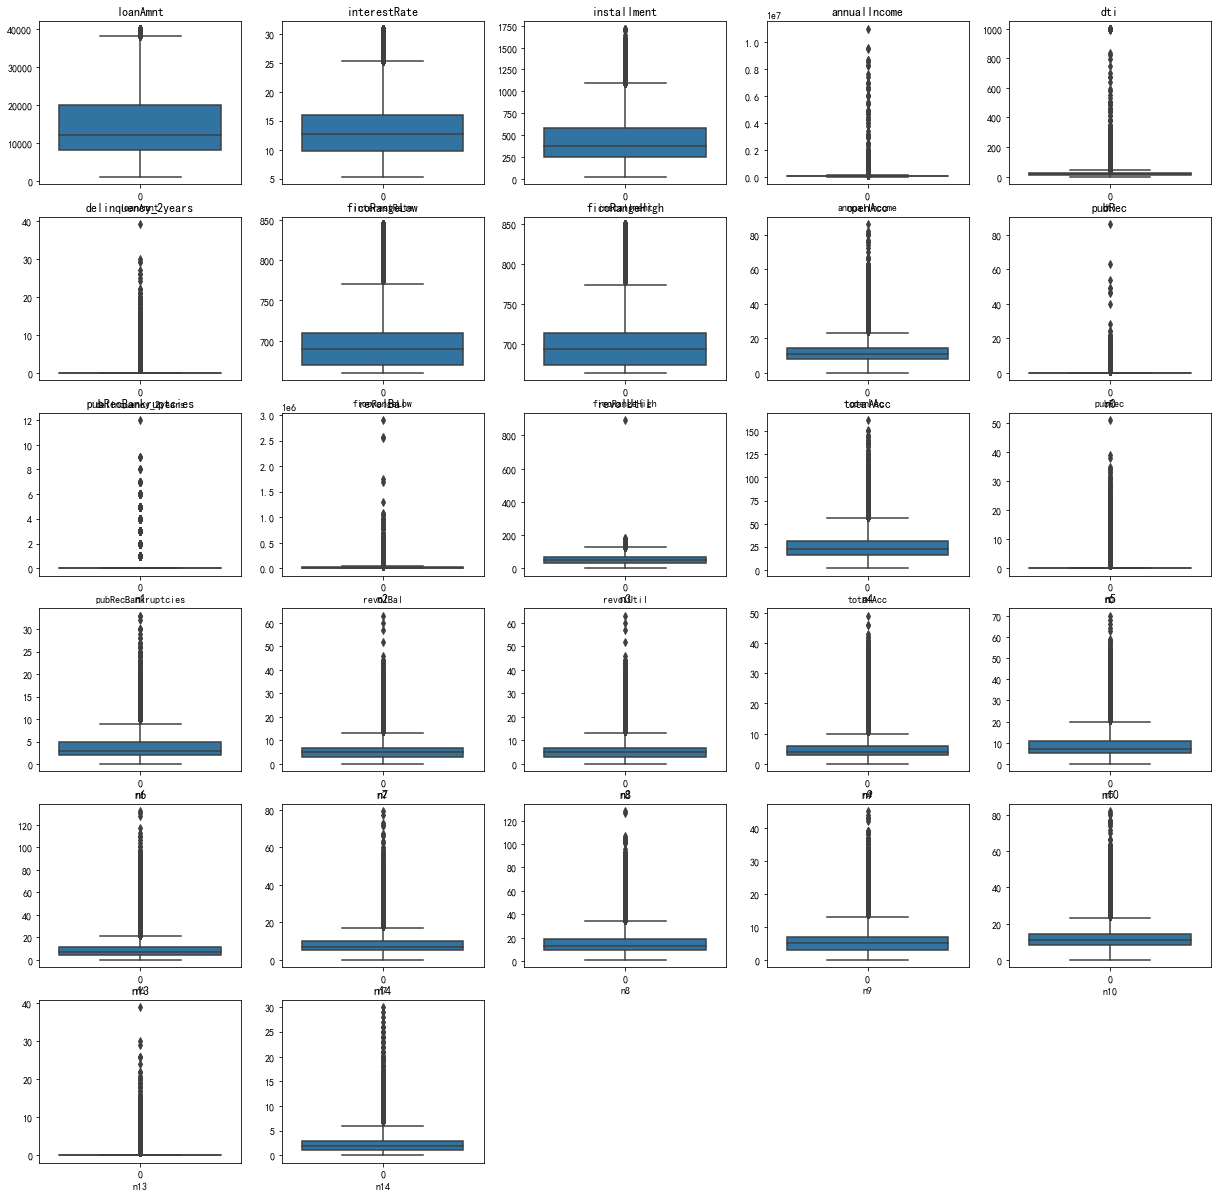

In [14]:
# 绘制箱型图
plt.figure(3, figsize=(21,21))
for i in range(len(num_fea)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(data=df_train[num_fea[i]])
    plt.title(num_fea[i])
    plt.xlabel(num_fea[i])

In [15]:
cc = []
shanchu1 = []
shanchu2 = []
for i in range(len(num_fea)):
    t = df_train[num_fea[i]]
    q1 = t.describe()['25%']
    q3 = t.describe()['75%']
    iqr = q3 - q1
    error = t[t<q1-1.5*iqr].append(t[t>q3+1.5*iqr])
    r = error.drop_duplicates().count() / t.drop_duplicates().count()
    if r < 0.1:
        shanchu1.append(num_fea[i])
        cc.append(list(error.index))
    else:
        shanchu2.append(num_fea[i])

### 2.5.2 3σ法

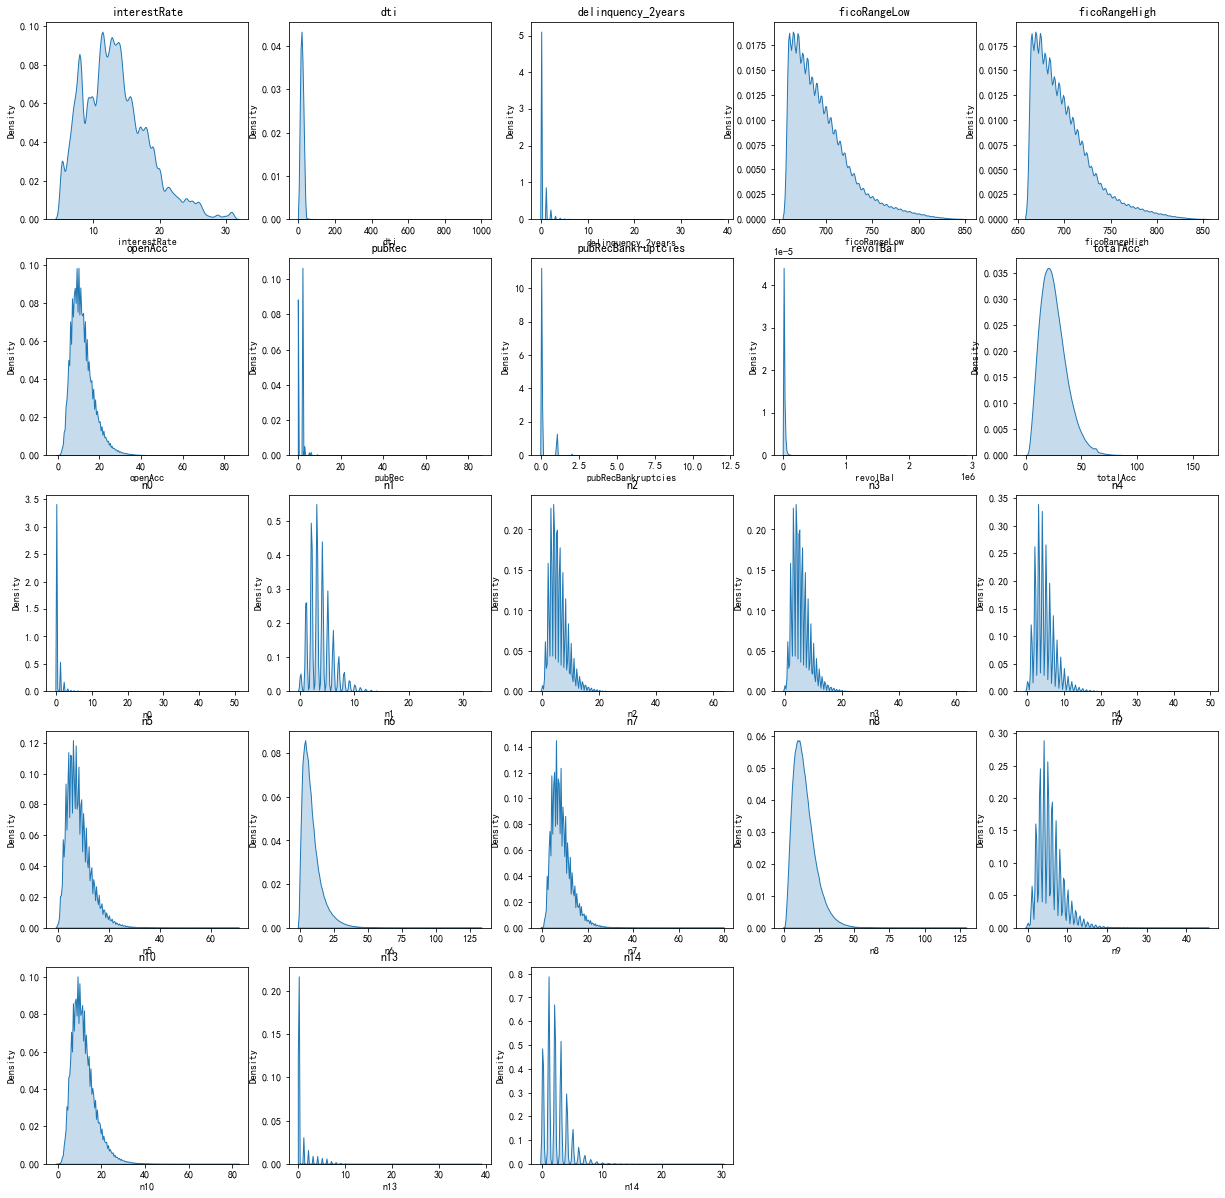

In [143]:
# 绘制密度图
plt.figure(2, figsize=(21,21))
for i in range(len(shanchu2)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(df_train[shanchu2[i]], shade=True)
    plt.title(shanchu2[i])
    plt.xlabel(shanchu2[i])

In [16]:
for i in range(len(shanchu2)):
    df_train[shanchu2[i]] = np.log(df_train[shanchu2[i]]).replace(float('-inf'), 0)
aa = []
for i in range(len(shanchu2)):
    t = df_train[shanchu2[i]]
    mean = t.mean()
    std = t.std()
    da = t[t > mean+2*std]
    xiao = t[t < mean-2*std]
    error = da.append(xiao)
    r = error.drop_duplicates().count() / t.drop_duplicates().count()
    if r < 0.1:
         cc.append(list(error.index))
    aa.append(r)

In [17]:
df_train = df_train.drop(list(set([n for a in cc for n in a ])))
df_train.index = range(df_train.shape[0])

In [18]:
df_train.shape

(683275, 47)

# 4.特征工程

## 4.1特征构造、特征选择

In [21]:
df_train['total_income'] = df_train['annualIncome'] * df_train['employmentLength'] #贷款期间总收入
df_train['avg_loanAmnt'] = df_train['loanAmnt'] / df_train['term'] #平均年贷款金额
df_train['rest_money'] = df_train['annualIncome'] - df_train['loanAmnt'] / df_train['term']
df_train['total_installment'] = df_train['installment'] * df_train['term'] #总分期付款金额
df_train['avg_ficoRange'] = (df_train['ficoRangeHigh'] + df_train['ficoRangeLow']) / 2

df_train = df_train.fillna(0)

In [22]:
print(df_train.columns)
del df_train['ficoRangeHigh']
del df_train['ficoRangeLow']
del df_train['index']
del df_train['id']

Index(['index', 'id', 'loanAmnt', 'term', 'interestRate', 'installment',
       'grade', 'subGrade', 'employmentTitle', 'employmentLength',
       'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate',
       'isDefault', 'purpose', 'postCode', 'regionCode', 'dti',
       'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
       'n11', 'n12', 'n13', 'n14', 'total_income', 'avg_loanAmnt',
       'rest_money', 'total_installment', 'avg_ficoRange'],
      dtype='object')


## 4.2样本重采样

In [23]:
# 处理样本不均衡的问题
n_1_sample = pd.Series(df_train['isDefault']).value_counts()[1]
n_0_sample = pd.Series(df_train['isDefault']).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(len(df_train),n_1_sample/len(df_train),n_0_sample/len(df_train)))
# 对标签为0的样本进行欠采样
idx_0 = df_train[df_train['isDefault'] == 0].index.values
idx_1 = df_train[df_train['isDefault'] == 1].index.values
random.shuffle(idx_0)
df_train = df_train.drop(idx_0[0:len(idx_0)-len(idx_1)])
# 欠采样结果
n_1_sample = pd.Series(df_train['isDefault']).value_counts()[1]
n_0_sample = pd.Series(df_train['isDefault']).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(len(df_train),n_1_sample/len(df_train),n_0_sample/len(df_train)))

样本个数：683275; 1占20.45%; 0占79.55%
样本个数：279436; 1占50.00%; 0占50.00%


## 4.3 PCA降维

In [24]:
df_train_y = df_train['isDefault']
del df_train['isDefault']

# 标准差标准化
sc = StandardScaler()
train_std = sc.fit(df_train).transform(df_train)
df_train = pd.DataFrame(train_std)

In [25]:
temp = df_train

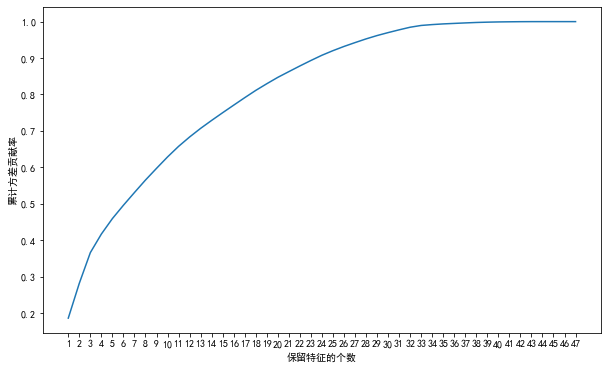

In [272]:
pca_line = PCA().fit(df_train)
plt.figure(figsize=(10,6))
plt.plot([i+1 for i in range(47)],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([i+1 for i in range(47)])
plt.xlabel("保留特征的个数")
plt.ylabel("累计方差贡献率")
plt.show()

In [26]:
# 找到可以解释94%的pca
pca = PCA(n_components=0.94,svd_solver="full")
df_train_pca = pca.fit(temp).transform(temp)
df_train_pca = pd.DataFrame(df_train_pca)
print(df_train_pca.shape)

(279436, 27)


In [27]:
# 压缩数据，否则占用内存过多，运行失败
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2    
    print("转换前的占用的内存为：", start_mem, "MB")
    for col in df.columns:
        df[col] = df[col].astype(np.float16)
    end_mem = df.memory_usage().sum() / 1024**2
    print("转换后的占用的内存为：", end_mem, "MB")
    print('压缩率为：{:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
X_pcad = reduce_mem_usage(df_train_pca)

转换前的占用的内存为： 57.562164306640625 MB
转换后的占用的内存为： 14.390632629394531 MB
压缩率为：75.0%


# 5.模型构建与融合

## 5.1划分数据集

In [28]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_pcad,df_train_y,test_size=0.35,random_state=100)

### 5.2随机森林

#### 5.2.1与决策树的比较

In [32]:
c_pre = DecisionTreeClassifier(random_state=100).fit(Xtrain,Ytrain).predict(Xtest)
r_pre = RandomForestClassifier(random_state=100).fit(Xtrain,Ytrain).predict(Xtest)

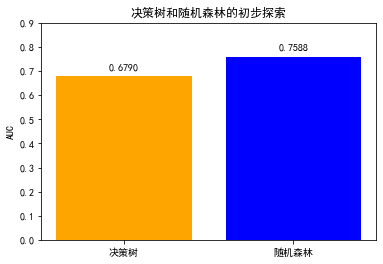

In [334]:
plt.bar(['决策树', '随机森林'], [roc_auc_score(Ytest, c_pre), roc_auc_score(Ytest, r_pre)], color=['orange','b'])
plt.title('决策树和随机森林的初步探索')
plt.ylabel('AUC')
plt.ylim([0, 0.9])
# 添加数值显示
for x, y in enumerate([roc_auc_score(Ytest, c_pre), roc_auc_score(Ytest, r_pre)]):
    plt.text(x,y+0.025,'{:.4f}'.format(y),ha='center')

#### 5.2.2 模型调参

#### 调n_estimators 

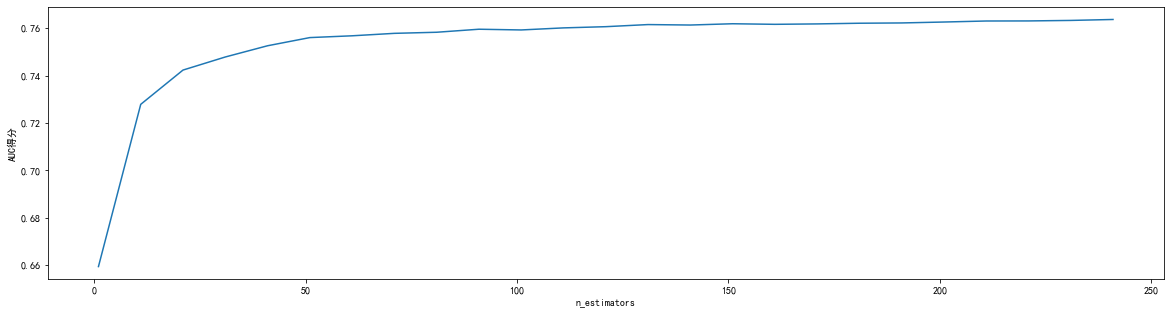

最高得分为： 0.7636739709099595
此时的n_estimators为： 241


In [402]:
scorel = []
for i in range(1,312,10):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=100).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.plot(range(1,251,10),ss)
plt.show()
print("最高得分为：", max(ss))
print("此时的n_estimators为：", ss.index(max(ss))*10+1)

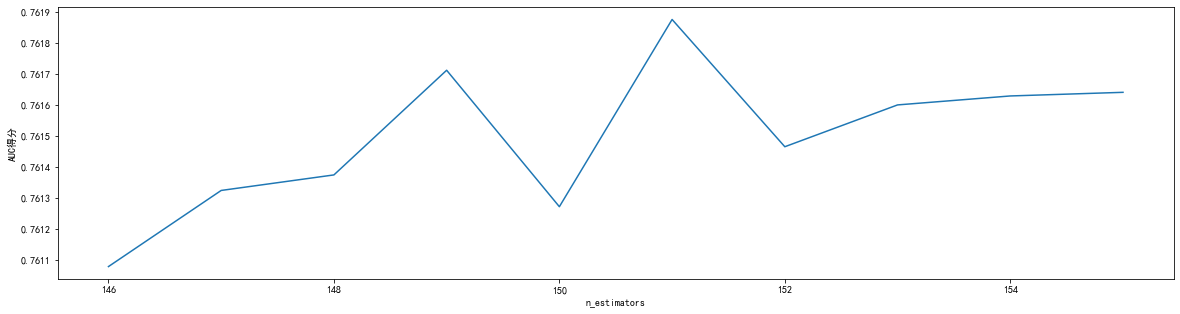

最高得分为： 0.7618752705926366
此时的n_estimators为： 151


In [363]:
scorel1 = []
for i in range(146,156,1):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=100).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel1.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('n_estimators')
plt.ylabel('AUC得分')
plt.plot(range(146,156,1),scorel1)
plt.show()
print("最高得分为：", max(scorel1))
print("此时的n_estimators为：", scorel1.index(max(scorel1))+146)

#### 调max_depth

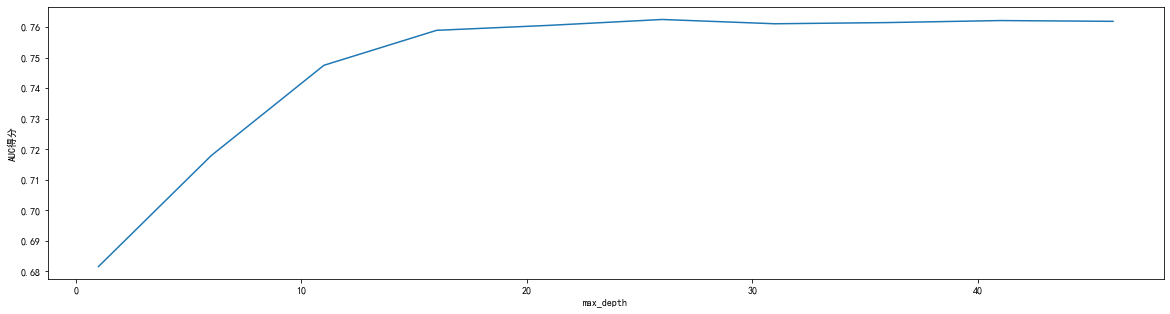

最高得分为： 0.762564895972307
此时的max_depth为： 26


In [366]:
scorel3 = []
for i in range(1,51,5):
    rfc = RandomForestClassifier(n_estimators=151, n_jobs=-1, random_state=100, max_depth=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel3.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('max_depth')
plt.ylabel('AUC得分')
plt.plot(range(1,51,5),scorel3)
plt.show()
print("最高得分为：", max(scorel3))
print("此时的max_depth为：", scorel3.index(max(scorel3))*5+1)

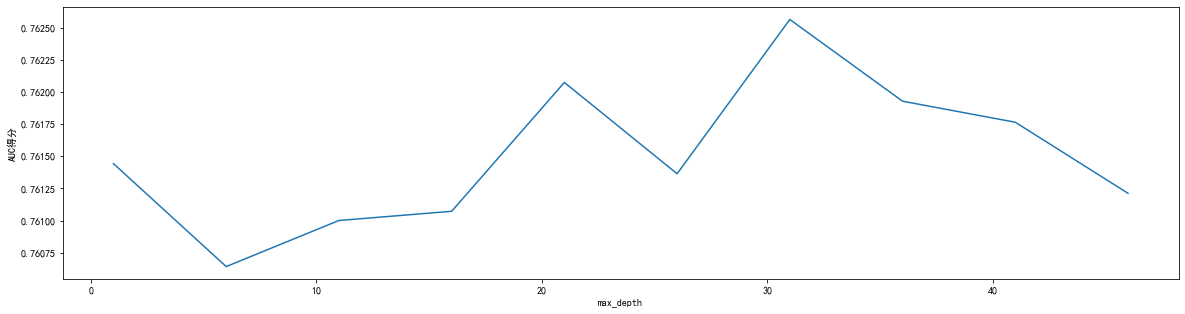

最高得分为： 0.762564895972307
此时的max_depth为： 26


In [369]:
scorel4 = []
for i in range(20,30,1):
    rfc = RandomForestClassifier(n_estimators=151, n_jobs=-1, random_state=100, max_depth=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel4.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('max_depth')
plt.ylabel('AUC得分')
plt.plot(range(1,51,5),scorel4)
plt.show()
print("最高得分为：", max(scorel4))
print("此时的max_depth为：", scorel4.index(max(scorel4))+20)

#### 调min_samples_leaf

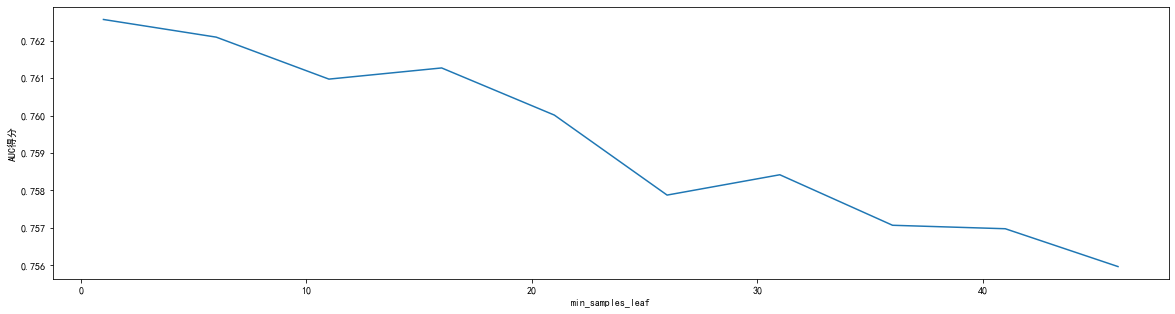

最高得分为： 0.762564895972307
此时的max_depth为： 1


In [372]:
scorel5 = []
for i in range(1,51,5):
    rfc = RandomForestClassifier(n_estimators=151, n_jobs=-1, random_state=100, max_depth=26, min_samples_leaf=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel5.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC得分')
plt.plot(range(1,51,5),scorel5)
plt.show()
print("最高得分为：", max(scorel5))
print("此时的max_depth为：", scorel5.index(max(scorel5))*5+1)

#### 调max_features

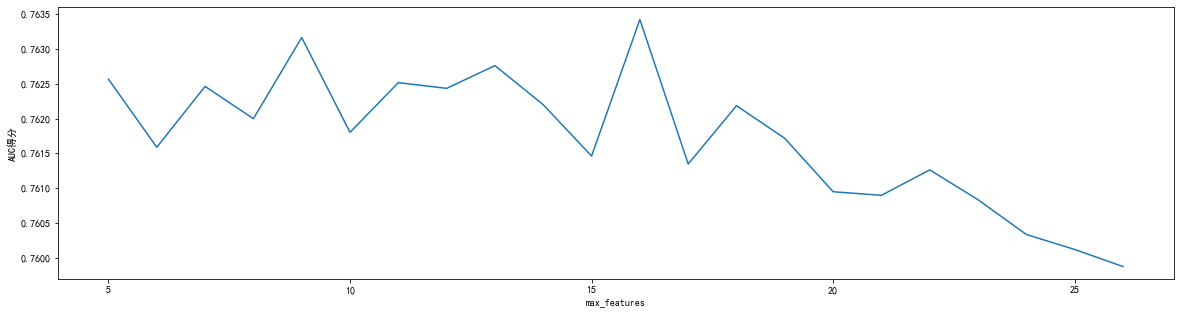

最高得分为： 0.7634223695466398
此时的max_depth为： 16


In [377]:
scorel6 = []
for i in range(5,27,1):
    rfc = RandomForestClassifier(n_estimators=151, n_jobs=-1, random_state=100, max_depth=26, max_features=i).fit(Xtrain,Ytrain)
    score = roc_auc_score(Ytest, rfc.predict(Xtest))
    scorel6.append(score)
plt.figure(figsize=[20,5])
plt.xlabel('max_features')
plt.ylabel('AUC得分')
plt.plot(range(5,27,1),scorel6)
plt.show()
print("最高得分为：", max(scorel6))
print("此时的max_depth为：", scorel6.index(max(scorel6))+5)

#### 调criterion

In [380]:
rfc = RandomForestClassifier(criterion='entropy', 
                             n_estimators=151, 
                             n_jobs=-1, 
                             random_state=100, 
                             max_depth=26, 
                             max_features=16)
rfc.fit(Xtrain,Ytrain).score(Xtest,Ytest)

0.7634326145414763

### 5.2.3模型评估

In [403]:
RFC = RandomForestClassifier(n_estimators=151, n_jobs=-1, random_state=100, max_depth=26, max_features=16)
RFC.fit(Xtrain, Ytrain)
predictions=RFC.predict(Xtest)
print('随机森林模型评估')
print("Accuracy:", accuracy_score(Ytest,predictions))
print("F1 Score:", f1_score(Ytest,predictions, average='weighted'))
print(classification_report(Ytest, predictions))

随机森林模型评估
Accuracy: 0.7633814913652955
F1 Score: 0.7632737555700719
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     48810
           1       0.78      0.74      0.76     48993

    accuracy                           0.76     97803
   macro avg       0.76      0.76      0.76     97803
weighted avg       0.76      0.76      0.76     97803



Text(53.0, 0.5, '真实值')

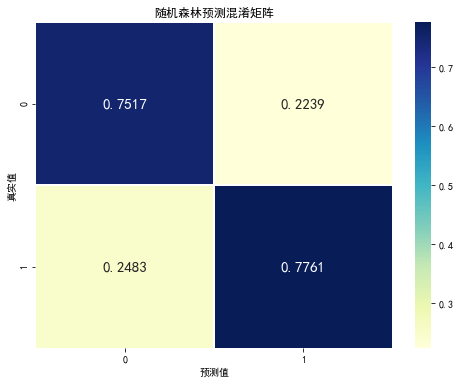

In [404]:
# 绘制混淆矩阵
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, predictions, labels=[0, 1])
sns.heatmap(C/sum(C), annot=True, fmt='.4f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15}) #画热力图
ax.set_title('随机森林预测混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

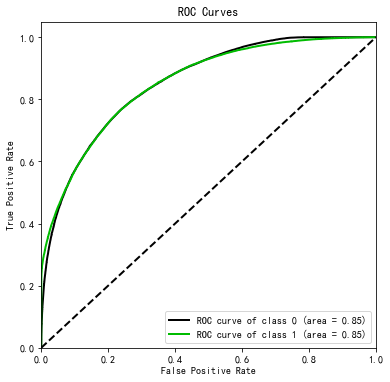

In [408]:
vali_proba_df = pd.DataFrame(RFC.predict_proba(Xtest))
skplt.metrics.plot_roc(Ytest, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

## 5.3逻辑回归

### 5.3.1模型调参

In [411]:
#构造两个初始分类器
LR1 = LogisticRegression(penalty= 'l1', C= 0.5, solver = 'liblinear', random_state = 100).fit(Xtrain, Ytrain)
LR2 = LogisticRegression(penalty= 'l2', C= 0.5, solver = 'liblinear', random_state = 100).fit(Xtrain, Ytrain)
# 计算AUC
score1 = roc_auc_score(Ytest, LR1.predict(Xtest))
score2 = roc_auc_score(Ytest, LR2.predict(Xtest))
print("L1正则化模型测试集上AUC为：", score1)
print("L2正则化模型测试集上AUC为：", score2)

L1正则化模型测试集上AUC为： 0.7729569560449605
L2正则化模型测试集上AUC为： 0.7729466357165959


#### 调penalty、C

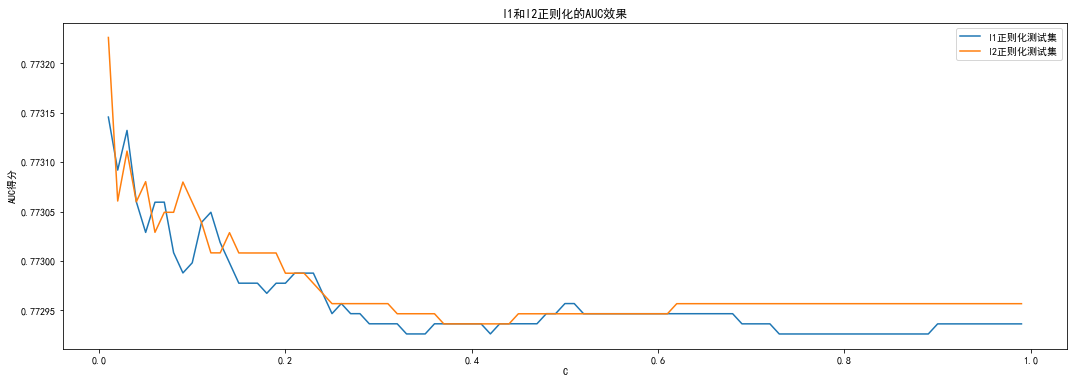

In [414]:
c = np.arange(0.01, 1, 0.01)
test1 = []
test2 = []
for i in range(len(c)):
    LR1 = LogisticRegression(penalty= 'l1', C= c[i], solver = 'liblinear', random_state = 100)
    LR2 = LogisticRegression(penalty= 'l2', C= c[i], solver = 'liblinear', random_state = 100)
    LR1.fit(Xtrain, Ytrain)
    LR2.fit(Xtrain, Ytrain)
    test1.append(roc_auc_score(Ytest, LR1.predict(Xtest)))
    test2.append(roc_auc_score(Ytest, LR2.predict(Xtest)))
plt.figure(figsize = (18, 6))
plt.plot(c, test1, label= "l1正则化测试集",)
plt.plot(c, test2, label= "l2正则化测试集")
plt.title("l1和l2正则化的AUC效果")
plt.xlabel('C')
plt.ylabel('AUC得分')
plt.legend()
plt.show()

In [415]:
print('得分最高为：', max(enumerate(test2), key=lambda x: x[-1])[1])
print('此时的C为：', c[max(enumerate(test2), key=lambda x: x[-1])[0]])

得分最高为： 0.7732259350522975
此时的C为： 0.01


#### 调solver

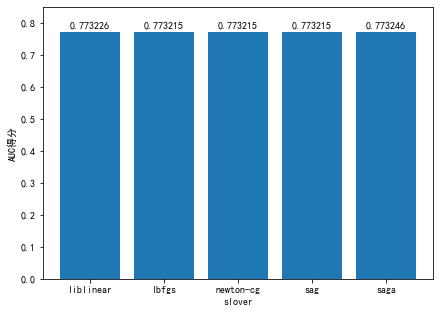

In [424]:
slovers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
scores = []  
for i in range(5):
    LR = LogisticRegression(C= 0.01, solver = slovers[i], random_state = 100).fit(Xtrain, Ytrain)
    scores.append(roc_auc_score(Ytest, LR.predict(Xtest)))
plt.figure(figsize = (7, 5))
plt.bar([0,1,2,3,4], scores)  
plt.xticks([0,1,2,3,4], slovers)  
plt.xlabel("slover")  
plt.ylabel("AUC得分")  
plt.ylim(ymax = 0.85)
for x, y in enumerate(scores):
    plt.text(x,y+0.01,'{:.6f}'.format(y),ha='center')

#### 调max_iterator

In [425]:
LR.n_iter_

array([29])

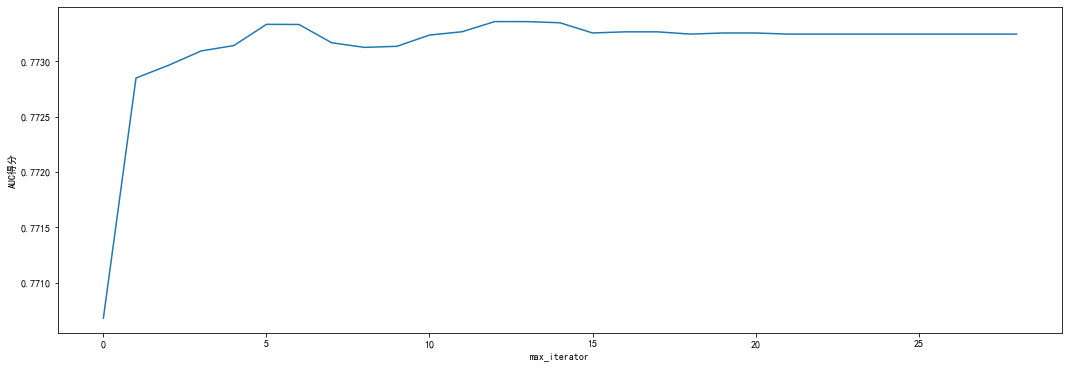

得分最高为： 0.7733587218554647 此时的max_iterator为： 13


In [426]:
sc = []
for i in range(29):
    LR = LogisticRegression(C= 0.01, solver = 'saga', random_state = 100, max_iter=i+1).fit(Xtrain, Ytrain)
    sc.append(roc_auc_score(Ytest, LR.predict(Xtest)))
plt.figure(figsize = (18, 6))
plt.plot(range(29), sc)
plt.xlabel("max_iterator")
plt.ylabel("AUC得分")  
plt.show()
print('得分最高为：', max(sc), '此时的max_iterator为：', sc.index(max(sc))+1)

#### class_weight

In [427]:
arr = [None, 'balanced']
best = 0
sc_max = 0
for i in range(99):
    arr.append({0:np.arange(0.01, 1, 0.01)[i], 1:(1-np.arange(0.01, 1, 0.01)[i])})
for i in range(101):
    LR = LogisticRegression(C= 0.01, solver = 'saga',random_state = 100, max_iter=13, class_weight = arr[i]).fit(Xtrain, Ytrain)
    score = roc_auc_score(Ytest, LR.predict(Xtest))
    if score > sc_max:
        sc_max = score
        best = arr[i]
print('最高AUC为：', sc_max, '此时的class_weight为：', best)

最高AUC为： 0.7765513696618176 此时的class_weight为： {0: 0.43, 1: 0.5700000000000001}


### 5.3.2模型评估

In [429]:
LR = LogisticRegression(C= 0.01, solver = 'saga', random_state = 100, max_iter=13, class_weight = {0: 0.43, 1: 0.57})
LR.fit(Xtrain, Ytrain)
#评估模型准确性
predictions=LR.predict(Xtest)
print('逻辑回归模型评估')
print("Accuracy:", accuracy_score(Ytest,predictions))
print("F1 Score:", f1_score(Ytest,predictions, average='weighted'))
print(classification_report(Ytest, predictions))

逻辑回归模型评估
Accuracy: 0.7766326186313304
F1 Score: 0.7762006763336232
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     48810
           1       0.76      0.82      0.79     48993

    accuracy                           0.78     97803
   macro avg       0.78      0.78      0.78     97803
weighted avg       0.78      0.78      0.78     97803



Text(53.0, 0.5, '真实值')

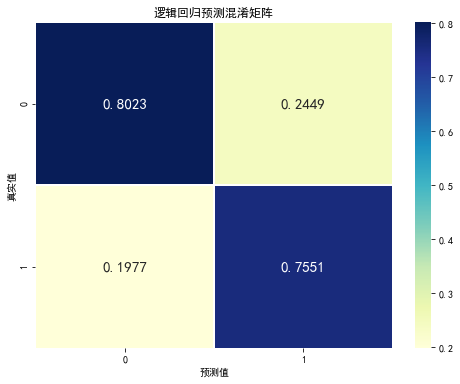

In [430]:
# 绘制混淆矩阵
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, predictions, labels=[0, 1])
sns.heatmap(C/sum(C), annot=True, fmt='.4f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15}) #画热力图
ax.set_title('逻辑回归预测混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

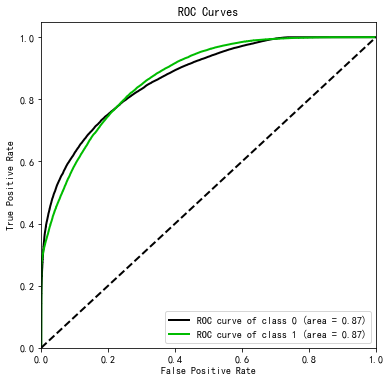

In [431]:
vali_proba_df = pd.DataFrame(LR.predict_proba(Xtest))
skplt.metrics.plot_roc(Ytest, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

## 5.4模型融合

### 5.4.1排序平均法融合

In [7]:
pre = pd.read_csv('baogaopre.csv')
Xtest = pd.read_csv('baogaoXtest.csv')
Ytest = pd.read_csv('baogaoYtest.csv')
res_sc = pd.read_csv('baogaores_sc.csv')

In [122]:
rfc_pre_pro = RFC.fit(Xtrain, Ytrain).predict_proba(Xtest)
lr_pre_pro = LR.fit(Xtrain, Ytrain).predict_proba(Xtest)

# id:概率
dic_rfc = {}
for i in range(len(rfc_pre_pro)):
    dic_rfc[i] = rfc_pre_pro[i][1]
dic_lr = {}
for i in range(len(lr_pre_pro)):
    dic_lr[i] = lr_pre_pro[i][1]
# id:概率
res_rfc = sorted(dic_rfc.items(), key=operator.itemgetter(1))
res_lr = sorted(dic_lr.items(), key=operator.itemgetter(1))
# id:排名
rfc_rank = {}
for i in range(97803):
    rfc_rank[res_rfc[i][0]] = i
lr_rank = {}
for i in range(97803):
    lr_rank[res_lr[i][0]] = i
rfc_rank = sorted(rfc_rank.items(), key=operator.itemgetter(0))
lr_rank = sorted(lr_rank.items(), key=operator.itemgetter(0))
for i in range(97803):
    rfc_rank[i] = rfc_rank[i][1] / 97802
for i in range(97803):
    lr_rank[i] = lr_rank[i][1] / 97802
    
res_sc = []
for i in range(97803):
    t = (rfc_rank[i] + lr_rank[i]) / 2
    res_sc.append([1 - t, t])
    
pre = []
for i in range(97803):
    if res_sc[i][0] < 0.5:
        pre.append(1)
    else:
        pre.append(0)

In [126]:
print("Accuracy:", accuracy_score(Ytest,pre))
print("F1 Score:", f1_score(Ytest,pre, average='weighted'))
print(classification_report(Ytest, pre))

Accuracy: 0.7769700315941229
F1 Score: 0.776969568998753
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     48888
           1       0.78      0.78      0.78     48915

    accuracy                           0.78     97803
   macro avg       0.78      0.78      0.78     97803
weighted avg       0.78      0.78      0.78     97803



Text(53.0, 0.5, '真实值')

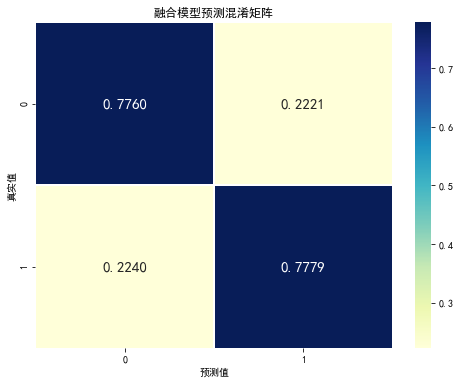

In [5]:
# 绘制混淆矩阵
f, ax = plt.subplots(figsize=(8,6))
C = confusion_matrix(Ytest, pre, labels=[0, 1])
sns.heatmap(C/sum(C), annot=True, fmt='.4f',ax=ax, linewidths=.5, cmap="YlGnBu",annot_kws={'size':15}) #画热力图
ax.set_title('融合模型预测混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

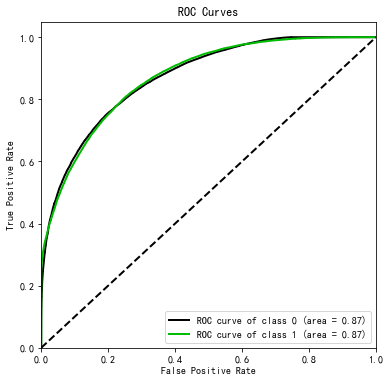

In [128]:
skplt.metrics.plot_roc(Ytest, pd.DataFrame(res_sc),plot_micro=False,figsize=(6,6),plot_macro=False)

### 5.4.2Boosting融合

In [68]:
def boosting(num, data1, labels1, clf, data2):
    x_train, x_test, y_train, y_test = train_test_split(data1, labels1, test_size=0.3)
    w = np.ones(len(x_train)) / len(x_train) 
    max_acc = 0 
    result_alpha = 0 
    best_w = np.zeros(len(x_train)) 

    for i in range(num):
        clf.fit(x_train, y_train, sample_weight=w)
        pre0 = clf.predict(x_train)
        pre1 = clf.predict(x_test)
        tt = y_train.values.reshape((1, len(y_train)))[0]
        miss = [int(t) for t in (pre0 != tt)]
        acc = roc_auc_score(y_test, pre1)
        alpha = 0.5*(np.log((acc)/(1-acc)))
        w = np.multiply(w,np.exp([-alpha * s for s in miss]))
        if acc > max_acc:
            max_acc = acc
            result_alpha = alpha
            best_w = w

    clf.fit(x_train, y_train, sample_weight=best_w)
    pre = clf.predict(data2)
    return result_alpha, pre

In [132]:
x = [50, 100, 150, 200, 250, 300, 350]
y = []
for i in range(len(x)):
    a1, p1= boosting(i, Xtrain, Ytrain, RFC, Xtest)
    a2, p2= boosting(i, Xtrain, Ytrain, LR, Xtest)
    alp1 = a1 / (a1+a2)
    alp2 = a2 / (a1+a2)
    pre = np.round(alp1*p1 + alp2*p2)
    acc = roc_auc_score(Ytest, pre)
    y.append(acc)

Boosting融合 50 次迭代之后模型的得分为： 0.7623369534208978
Boosting融合 100 次迭代之后模型的得分为： 0.7626939434777379
Boosting融合 150 次迭代之后模型的得分为： 0.7616411305747082
Boosting融合 200 次迭代之后模型的得分为： 0.7609563763415754
Boosting融合 250 次迭代之后模型的得分为： 0.7611194398566717
Boosting融合 300 次迭代之后模型的得分为： 0.7602508115352034
Boosting融合 350 次迭代之后模型的得分为： 0.762980137315535


In [50]:
x = ['迭代50次','迭代100次','迭代150次','迭代200次','迭代250次','迭代300次','迭代350次','随机森林','逻辑回归','排序平均融合',]

In [51]:
scores = [0.7623369534208978,0.7626939434777379,0.7616411305747082,0.7609563763415754,
     0.7611194398566717,0.7602508115352034,0.762980137315535,
     0.7634326145414763,0.7765513696618176,0.7769704521097508]

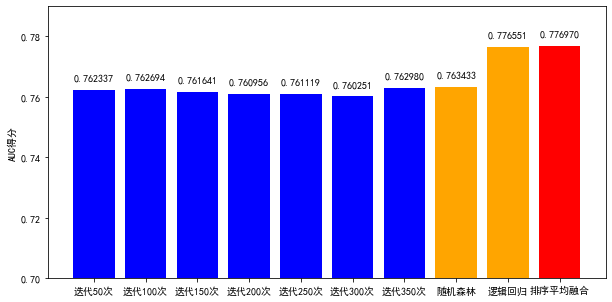

In [52]:
plt.figure(figsize = (10, 5))
plt.bar(x, scores, color=['b','b','b','b','b','b','b','orange','orange','r',])  
plt.ylabel("AUC得分")  
plt.ylim(ymax = 0.79)
plt.ylim(ymin = 0.70)
for x, y in enumerate(scores):
    plt.text(x,y+0.003,'{:.6f}'.format(y),ha='center')